In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn

In [360]:
### Decide about the features to take according to the submission file
data = pd.read_csv('calls_Irina/train_2011_2012_2013.csv',sep=';',usecols=['DATE','ASS_ASSIGNMENT','CSPL_RECEIVED_CALLS'])

In [361]:
subm_data = pd.read_table('calls_Irina/submission.txt')

In [9]:
import pickle
pickle.dump(data, open('data.pkl','wb'))
pickle.dump(subm_data, open('subm_data.pkl','wb'))

In [326]:
data = pickle.load(open('data.pkl', 'rb'))
subm_data = pickle.load(open('subm_data.pkl', 'rb'))

In [362]:
import time
data['time'] = data['DATE'].apply(lambda x: time.strptime(x, '%Y-%m-%d %H:%M:%S.000'))
subm_data['time'] = subm_data['DATE'].apply(lambda x: time.strptime(x, '%Y-%m-%d %H:%M:%S.000'))

In [363]:
data['day_week'] = data['time'].apply(lambda x: int(time.strftime("%w", x)))
data['day_month'] = data['time'].apply(lambda x: int(time.strftime("%d", x)))
data['month'] = data['time'].apply(lambda x: int(time.strftime("%m", x)))
data['time_absolut'] = data['time'].apply(time.mktime)
#data['hours'] = data['time'].apply(lambda x: float(time.strftime("%H", x)))
data['year'] = data['time'].apply(lambda x: float(time.strftime("%Y", x)))
data['if_weekend'] = data['day_week'].apply(lambda x: 1 if x == 0 or x == 6 else 0)

data['hours'] = data['time'].apply(lambda x: float(time.strftime("%H", x))+np.sign(float(time.strftime("%M", x)))*0.5)

data['if_night'] = data['hours'].apply(lambda x: 1 if x >= 7.5 and x <= 23.5 else 0) 

### New feature: hours since the start of the day

subm_data['time_absolut'] = subm_data['time'].apply(time.mktime)
subm_data['day_week'] = subm_data['time'].apply(lambda x: int(time.strftime("%w", x)))
subm_data['day_month'] = subm_data['time'].apply(lambda x: int(time.strftime("%d", x)))
subm_data['month'] = subm_data['time'].apply(lambda x: int(time.strftime("%m", x)))
subm_data['time_absolut'] = subm_data['time'].apply(time.mktime)
# subm_data['hours'] = subm_data['time'].apply(lambda x: float(time.strftime("%H", x)))
subm_data['hours'] = subm_data['time'].apply(lambda x: float(time.strftime("%H", x))+np.sign(float(time.strftime("%M", x)))*0.5)



subm_data['year'] = subm_data['time'].apply(lambda x: float(time.strftime("%Y", x)))
subm_data['if_weekend'] = subm_data['day_week'].apply(lambda x: 1 if x == 0 or x == 6 else 0)
subm_data['if_night'] = subm_data['hours'].apply(lambda x: 1 if x >= 7.5 and x <= 23.5 else 0) 


In [328]:
d = data.groupby(['hours','year','month','day_month','day_week',
                  'ASS_ASSIGNMENT','if_weekend','if_night',
                  'time','time_absolut'],as_index=False)['CSPL_RECEIVED_CALLS'].sum()
data_merged = d

In [329]:
pickle.dump(data_merged, open('data_merged.pkl','wb'))
data = data_merged

In [368]:
data = pickle.load(open('data_merged.pkl','rb'))

In [369]:
data

,hours,year,month,day_month,day_week,ASS_ASSIGNMENT,if_weekend,if_night,time,time_absolut,CSPL_RECEIVED_CALLS
0,0.0,2011.0,1,1,6,Crises,1,0,"(2011, 1, 1, 0, 0, 0, 5, 1, -1)",1.293836e+09,0
1,0.0,2011.0,1,1,6,Domicile,1,0,"(2011, 1, 1, 0, 0, 0, 5, 1, -1)",1.293836e+09,0
2,0.0,2011.0,1,1,6,Gestion,1,0,"(2011, 1, 1, 0, 0, 0, 5, 1, -1)",1.293836e+09,0
3,0.0,2011.0,1,1,6,Gestion - Accueil Telephonique,1,0,"(2011, 1, 1, 0, 0, 0, 5, 1, -1)",1.293836e+09,0
4,0.0,2011.0,1,1,6,Gestion Amex,1,0,"(2011, 1, 1, 0, 0, 0, 5, 1, -1)",1.293836e+09,0
5,0.0,2011.0,1,1,6,Gestion Assurances,1,0,"(2011, 1, 1, 0, 0, 0, 5, 1, -1)",1.293836e+09,0
6,0.0,2011.0,1,1,6,Gestion Clients,1,0,"(2011, 1, 1, 0, 0, 0, 5, 1, -1)",1.293836e+09,0
7,0.0,2011.0,1,1,6,Gestion Renault,1,0,"(2011, 1, 1, 0, 0, 0, 5, 1, -1)",1.293836e+09,0
8,0.0,2011.0,1,1,6,Japon,1,0,"(2011, 1, 1, 0, 0, 0, 5, 1, -1)",1.293836e+09,0
9,0.0,2011.0,1,1,6,Manager,1,0,"(2011, 1, 1, 0, 0, 0, 5, 1, -1)",1.293836e+09,0


In [94]:
cats = data['ASS_ASSIGNMENT'].unique()

In [16]:
# data = data.sample(10000)

In [114]:
def scorer(est, X, y):
    return np.mean(eval_metric(est.predict(X),y))

create all models except of telephonie

In [429]:
import time
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from tqdm import tqdm
#models << xgb
models_rf = {}
indexes = ['hours','year','month','day_month','day_week','if_weekend','if_night']
for cat in tqdm(cats):
    if (cat not in models_rf) and (cat != 'Téléphonie'):
        print(cat)
        print(len(data[data['ASS_ASSIGNMENT'] == cat]))
        start_time = time.time()
        data_sub = data[data['ASS_ASSIGNMENT'] == cat]
        data_sub = data_sub[data_sub['year'] < 2013]
        X = data_sub[indexes]
        Y = data_sub['CSPL_RECEIVED_CALLS']
#         model = xgb.XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=80, silent=False, 
#                                  objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
#                                  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
        
#         X_train, X_test, y_train, y_test = train_test_split(X,Y)
        model = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None,
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                              bootstrap=True, oob_score=False, n_jobs=-1,
                              random_state=None, verbose=0, warm_start=False)
        
        model.fit(X,Y)
#         scores = cross_val_score(model,X,Y,scoring=scorer)
#         print("eval: ",scores)
        
        models_rf[cat] = model
        print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/28 [00:00<?, ?it/s]

RTC
21589


  7%|▋         | 2/28 [00:00<00:09,  2.83it/s]

--- 0.48636436462402344 seconds ---
Gestion Renault
46285


 11%|█         | 3/28 [00:01<00:10,  2.46it/s]

--- 0.2974510192871094 seconds ---
Nuit
48478


 14%|█▍        | 4/28 [00:02<00:12,  1.87it/s]

--- 0.593026876449585 seconds ---
Gestion - Accueil Telephonique
47225


 18%|█▊        | 5/28 [00:02<00:13,  1.71it/s]

--- 0.46553826332092285 seconds ---
Regulation Medicale
46249


 21%|██▏       | 6/28 [00:03<00:12,  1.69it/s]

--- 0.48412656784057617 seconds ---
Services
48477


 25%|██▌       | 7/28 [00:04<00:13,  1.54it/s]

--- 0.5452187061309814 seconds ---
Tech. Total
44654


 29%|██▊       | 8/28 [00:04<00:13,  1.47it/s]

--- 0.5202775001525879 seconds ---
Gestion Relation Clienteles
32149


 32%|███▏      | 9/28 [00:05<00:12,  1.51it/s]

--- 0.4032282829284668 seconds ---
Crises
17792


 36%|███▌      | 10/28 [00:06<00:11,  1.55it/s]

--- 0.39075493812561035 seconds ---
Japon
48433


 39%|███▉      | 11/28 [00:07<00:12,  1.35it/s]

--- 0.7330911159515381 seconds ---
Médical
48478


 43%|████▎     | 12/28 [00:07<00:12,  1.32it/s]

--- 0.5486767292022705 seconds ---
Gestion Assurances
40879


 46%|████▋     | 13/28 [00:08<00:10,  1.37it/s]

--- 0.42623400688171387 seconds ---
Domicile
48478


 50%|█████     | 14/28 [00:09<00:10,  1.33it/s]

--- 0.5789453983306885 seconds ---


 54%|█████▎    | 15/28 [00:09<00:09,  1.42it/s]

Gestion
48093
--- 0.3373227119445801 seconds ---
SAP
47661


 57%|█████▋    | 16/28 [00:10<00:08,  1.47it/s]

--- 0.39280152320861816 seconds ---
RENAULT
48476


 61%|██████    | 17/28 [00:11<00:07,  1.39it/s]

--- 0.5611147880554199 seconds ---
Gestion Amex
13507


 64%|██████▍   | 18/28 [00:11<00:06,  1.57it/s]

--- 0.3352086544036865 seconds ---
Tech. Inter
48476


 68%|██████▊   | 19/28 [00:12<00:06,  1.41it/s]

--- 0.6353023052215576 seconds ---
Gestion Clients
33614


 71%|███████▏  | 20/28 [00:13<00:05,  1.47it/s]

--- 0.3778817653656006 seconds ---
Manager
40441


 75%|███████▌  | 21/28 [00:14<00:04,  1.46it/s]

--- 0.46460652351379395 seconds ---
Tech. Axa
47516


 79%|███████▊  | 22/28 [00:14<00:04,  1.43it/s]

--- 0.5616557598114014 seconds ---
CAT
21503


 82%|████████▏ | 23/28 [00:15<00:03,  1.42it/s]

--- 0.48819565773010254 seconds ---
Gestion DZ
31931


 86%|████████▌ | 24/28 [00:16<00:02,  1.48it/s]

--- 0.38534975051879883 seconds ---
Mécanicien
27131


 89%|████████▉ | 25/28 [00:16<00:01,  1.51it/s]

--- 0.4776334762573242 seconds ---
CMS


 93%|█████████▎| 26/28 [00:17<00:01,  1.61it/s]

18803
--- 0.2862832546234131 seconds ---


 96%|█████████▋| 27/28 [00:17<00:00,  1.73it/s]

Prestataires
15354
--- 0.32415270805358887 seconds ---
Evenements
662


100%|██████████| 28/28 [00:18<00:00,  1.80it/s]

--- 0.29406189918518066 seconds ---


check performance of each model except telephonie

In [218]:
for cat in tqdm(cats):
    if (cat != 'Téléphonie'):
        print(cat)
        print(len(data[data['ASS_ASSIGNMENT'] == cat]))
        start_time = time.time()
        X = data[data['ASS_ASSIGNMENT'] == cat][indexes]
        Y = data[data['ASS_ASSIGNMENT'] == cat]['CSPL_RECEIVED_CALLS']
#         model = xgb.XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=80, silent=False, 
#                                  objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
#                                  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
        
#         X_train, X_test, y_train, y_test = train_test_split(X,Y)
        model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=None,
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                              bootstrap=True, oob_score=False, n_jobs=-1,
                              random_state=None, verbose=0, warm_start=False)
        
#         model.fit(X,Y)
        scores = cross_val_score(model,X,Y,scoring=scorer)
        print("eval: ",scores)

  0%|          | 0/28 [00:00<?, ?it/s]

RTC
43123


  7%|▋         | 2/28 [00:13<02:57,  6.82s/it]

eval:  [ 0.0559589   0.04583487  0.05504526]
Gestion Renault
46285


 11%|█         | 3/28 [00:18<02:37,  6.31s/it]

eval:  [  7.39967944e-05   4.17636025e-05   0.00000000e+00]
Nuit
192868


 14%|█▍        | 4/28 [01:00<06:45, 16.91s/it]

eval:  [ 0.05294385  0.1122816   0.04259602]
Gestion - Accueil Telephonique
126677


 18%|█▊        | 5/28 [01:20<06:53, 17.99s/it]

eval:  [ 0.01668125  0.02196176  0.06599864]
Regulation Medicale
92274


 21%|██▏       | 6/28 [01:44<07:15, 19.78s/it]

eval:  [ 0.00394476  0.00278323  0.00242509]
Services
410137


 25%|██▌       | 7/28 [03:18<14:42, 42.04s/it]

eval:  [ 0.03335072  0.03989061  0.0614625 ]
Tech. Total
219987


 29%|██▊       | 8/28 [04:11<15:02, 45.13s/it]

eval:  [ 0.08985805  0.11675394  0.2480983 ]
Gestion Relation Clienteles
32149


 32%|███▏      | 9/28 [04:19<10:46, 34.03s/it]

eval:  [ 0.00128896  0.00186523  0.00166754]
Crises
26652


 36%|███▌      | 10/28 [04:24<07:36, 25.36s/it]

eval:  [  5.54501251e-03   3.61420400e-04   8.42696828e-06]
Japon
92392


 39%|███▉      | 11/28 [04:50<07:16, 25.68s/it]

eval:  [ 0.00387726  0.00406957  0.00367602]
Médical
373492


 43%|████▎     | 12/28 [06:14<11:30, 43.15s/it]

eval:  [ 0.02507722  0.0208999   0.01616442]
Gestion Assurances
40879


 46%|████▋     | 13/28 [06:22<08:09, 32.64s/it]

eval:  [ 0.00389201  0.00415753  0.00592265]
Domicile
193886


 50%|█████     | 14/28 [07:09<08:35, 36.81s/it]

eval:  [ 0.18813689  0.1913337   0.22880436]
Gestion
48093


 54%|█████▎    | 15/28 [07:15<05:58, 27.60s/it]

eval:  [  4.91596591e-06   1.94322712e-05   3.98121215e-05]
SAP
47661


 57%|█████▋    | 16/28 [07:26<04:29, 22.45s/it]

eval:  [ 0.01070608  0.0068759   0.00604757]
RENAULT
359561


 61%|██████    | 17/28 [08:47<07:22, 40.19s/it]

eval:  [ 0.01228446  0.00702662  0.06587262]
Gestion Amex
13507


 64%|██████▍   | 18/28 [08:52<04:55, 29.51s/it]

eval:  [ 0.00240047  0.00046334  0.00075289]
Tech. Inter
427524


 68%|██████▊   | 19/28 [10:22<07:08, 47.60s/it]

eval:  [ 0.02482108  0.01686518  0.02808329]
Gestion Clients
33614


 71%|███████▏  | 20/28 [10:30<04:47, 35.96s/it]

eval:  [ 0.0017198   0.00157232  0.00183175]
Manager
91824


 75%|███████▌  | 21/28 [10:48<03:33, 30.57s/it]

eval:  [ 0.00015996  0.00011018  0.00010752]
Tech. Axa
416986


 79%|███████▊  | 22/28 [12:14<04:43, 47.25s/it]

eval:  [   431.51846726  37368.79358934    114.74989068]
CAT
41206


 82%|████████▏ | 23/28 [12:28<03:06, 37.24s/it]

eval:  [  3.06928651e+02   6.37609246e+03   9.35330259e+05]
Gestion DZ
31931


 86%|████████▌ | 24/28 [12:35<01:52, 28.18s/it]

eval:  [ 0.00025287  0.00021129  0.00022393]
Mécanicien
53768


 89%|████████▉ | 25/28 [12:48<01:10, 23.62s/it]

eval:  [ 0.00292173  0.00244747  0.00247667]
CMS
18803


 93%|█████████▎| 26/28 [12:54<00:36, 18.10s/it]

eval:  [  1.39655497e-04   6.33290150e-05   4.29571530e-05]
Prestataires
15354


 96%|█████████▋| 27/28 [12:58<00:14, 14.14s/it]

eval:  [  1.23639603e-04   1.27342648e-04   5.37691103e-05]
Evenements
662


100%|██████████| 28/28 [13:02<00:00, 11.01s/it]

eval:  [  2.38700040e+03   1.29938463e+17   9.05860288e+30]


## here we create submission file

In [454]:
indexes = ['hours','year','month','day_month','day_week','if_weekend','if_night']

for cat in tqdm(subm_data['ASS_ASSIGNMENT'].unique()):
    print(cat)
    mask = subm_data['ASS_ASSIGNMENT'] == cat
    if cat == 'Téléphonie':
        # here must be telephonie)))
        data_sub1 = data[data['ASS_ASSIGNMENT'] == 'Téléphonie']
        
        def get_max(x):
            tmp = data_sub1.query('hours >= @x.hours -1 & hours <= @x.hours + 1 & day_week == @x.day_week & time_absolut <= @x.time_absolut')
            return tmp['CSPL_RECEIVED_CALLS'].max()
        
        data_subm_sub1 = subm_data[subm_data['ASS_ASSIGNMENT'] == 'Téléphonie']
        data_subm_sub1['max_in_hour'] = data_subm_sub1.apply(get_max, axis=1)
        res = data_subm_sub1['max_in_hour']
        
#     else:
#         data_sub1 = data[data['ASS_ASSIGNMENT'] == cat]
        
#         def get_max(x):
#             tmp = data_sub1.query('hours >= @x.hours -1 & hours <= @x.hours + 1 & day_week == @x.day_week & time_absolut >= @x.time_absolut')
#             return tmp['CSPL_RECEIVED_CALLS'].max()
        
#         data_subm_sub1 = subm_data[subm_data['ASS_ASSIGNMENT'] == cat]
#         data_subm_sub1['max_in_hour'] = data_subm_sub1.apply(get_max, axis=1)
#         res = data_subm_sub1['max_in_hour']
        
#         print(res)
#         break
#         print(data_sub1['day_week'].unique())
    else:
        if cat == 'Nuit':
        # here must be telephonie)))
            data_sub1 = data[data['ASS_ASSIGNMENT'] == 'Nuit']

            def get_max(x):
                tmp = data_sub1.query('hours >= @x.hours - 1 & hours <= @x.hours + 1 & day_week == @x.day_week & time_absolut <= @x.time_absolut & time_absolut >= (@x.time_absolut - 2*691200)')
                return tmp['CSPL_RECEIVED_CALLS'].max()

            data_subm_sub1 = subm_data[subm_data['ASS_ASSIGNMENT'] == 'Nuit']
            data_subm_sub1['max_in_hour'] = data_subm_sub1.apply(get_max, axis=1)
            res = data_subm_sub1['max_in_hour']
        else:
            data_sub1 = data[data['ASS_ASSIGNMENT'] == cat]

            def get_max(x):
                tmp = data_sub1.query('hours >= @x.hours - 1 & hours <= @x.hours + 1 & day_week == @x.day_week & time_absolut <= @x.time_absolut & time_absolut >= (@x.time_absolut - 2*691200)')
                return tmp['CSPL_RECEIVED_CALLS'].max()

            data_subm_sub1 = subm_data[subm_data['ASS_ASSIGNMENT'] == cat]
            data_subm_sub1['max_in_hour'] = data_subm_sub1.apply(get_max, axis=1)
            res = data_subm_sub1['max_in_hour']
            
            
    #         continue
            #predict by random forest
            res2 = models_rf[cat].predict(subm_data[mask][indexes])

            if cat == 'CAT':
                res2 = res2*(np.exp(-res2/100)*2+1)
            if cat == 'Tech. Axa':
                res2 = res2*(np.exp(-res2/100)*2+1)
                
#             if cat == 'Gestion - Accueil Telephonique':
#                 res = res*1.2

            res = pd.Series(res, index=subm_data[mask].index)
            res2 = pd.Series(res2, index=subm_data[mask].index)
            res = pd.concat([res, res2], axis=1)
            res = res.fillna(0)
            res = res.max(axis=1)
    if np.sum(pd.isnull(res)) > 0:
        print(res)
        print('----')
    subm_data.ix[mask, 'xgb_pred'] = res
    
subm_data['xgb_pred'] = subm_data['xgb_pred'].apply(lambda x: int(np.round(x)))
subm_data = subm_data.drop('prediction', 1)
subm_data = subm_data.rename(index=str, columns={'xgb_pred':'prediction'})
subm_data[['DATE','ASS_ASSIGNMENT','prediction']].to_csv('submission_xgb.txt',sep='\t',index=False)


  0%|          | 0/26 [00:00<?, ?it/s]

CMS



Exception in thread Thread-49435:
Traceback (most recent call last):
  File "/usr/lib/python3.4/threading.py", line 920, in _bootstrap_inner
    self.run()
  File "/home/alogins/.local/lib/python3.4/site-packages/tqdm/_tqdm.py", line 102, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.4/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  4%|▍         | 1/26 [00:13<05:49, 13.97s/it]

Crises


  8%|▊         | 2/26 [00:15<04:06, 10.27s/it]

Domicile


 12%|█▏        | 3/26 [00:46<06:21, 16.59s/it]

Gestion


 15%|█▌        | 4/26 [01:17<07:39, 20.89s/it]

Gestion - Accueil Telephonique


 19%|█▉        | 5/26 [01:48<08:17, 23.69s/it]

Gestion Assurances


 23%|██▎       | 6/26 [02:11<07:54, 23.71s/it]

Gestion Relation Clienteles


 27%|██▋       | 7/26 [02:36<07:33, 23.87s/it]

Gestion Renault


 31%|███       | 8/26 [03:03<07:31, 25.06s/it]

Japon


 35%|███▍      | 9/26 [03:35<07:37, 26.90s/it]

Médical


 38%|███▊      | 10/26 [04:06<07:31, 28.22s/it]

Nuit


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 42%|████▏     | 11/26 [04:37<07:16, 29.10s/it]

RENAULT


 46%|████▌     | 12/26 [05:08<06:55, 29.69s/it]

Regulation Medicale


 50%|█████     | 13/26 [05:38<06:25, 29.69s/it]

SAP


 54%|█████▍    | 14/26 [06:07<05:55, 29.63s/it]

Services


 58%|█████▊    | 15/26 [06:39<05:32, 30.18s/it]

Tech. Axa


 62%|██████▏   | 16/26 [07:10<05:05, 30.59s/it]

Tech. Inter


 65%|██████▌   | 17/26 [07:42<04:38, 30.99s/it]

Téléphonie


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 69%|██████▉   | 18/26 [08:08<03:54, 29.27s/it]

Tech. Total


 73%|███████▎  | 19/26 [08:38<03:27, 29.63s/it]

Mécanicien


 77%|███████▋  | 20/26 [08:56<02:37, 26.26s/it]

CAT


 81%|████████  | 21/26 [09:08<01:49, 21.85s/it]

Manager


 85%|████████▍ | 22/26 [09:32<01:30, 22.61s/it]

Gestion Clients


 88%|████████▊ | 23/26 [09:53<01:06, 22.08s/it]

Gestion DZ


 92%|█████████▏| 24/26 [10:14<00:43, 21.63s/it]

RTC


 96%|█████████▌| 25/26 [10:26<00:18, 18.89s/it]

Prestataires


100%|██████████| 26/26 [10:37<00:00, 16.60s/it]


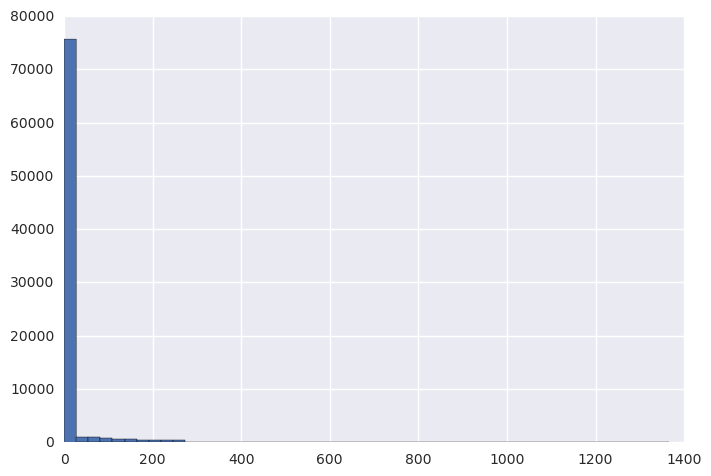

In [418]:
subm_data['prediction'].hist(bins=50)

------ data analysis

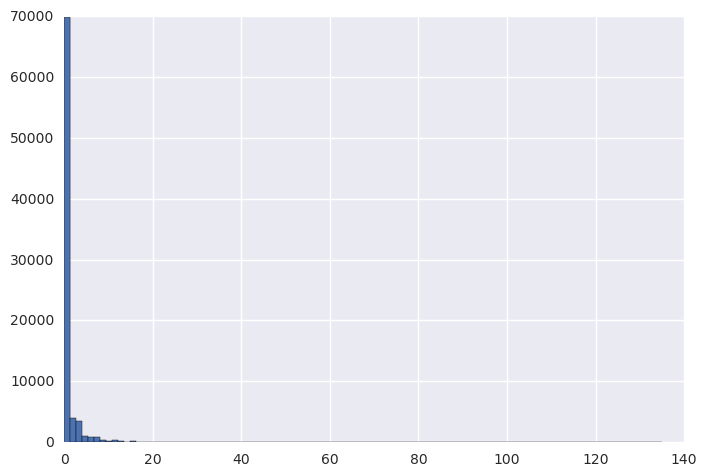

In [141]:
subm_data['prediction'].hist(bins=100)

In [48]:
cats = data['ASS_ASSIGNMENT'].unique()

array(['Crises', 'Domicile', 'Gestion', 'Gestion - Accueil Telephonique',
       'Gestion Amex', 'Gestion Assurances', 'Gestion Clients',
       'Gestion Renault', 'Japon', 'Manager', 'Médical', 'Nuit', 'RENAULT',
       'Regulation Medicale', 'SAP', 'Services', 'Tech. Axa',
       'Tech. Inter', 'Téléphonie', 'Tech. Total', 'Mécanicien',
       'Gestion Relation Clienteles', 'CAT', 'Gestion DZ', 'CMS', 'RTC',
       'Prestataires', 'Evenements'], dtype=object)

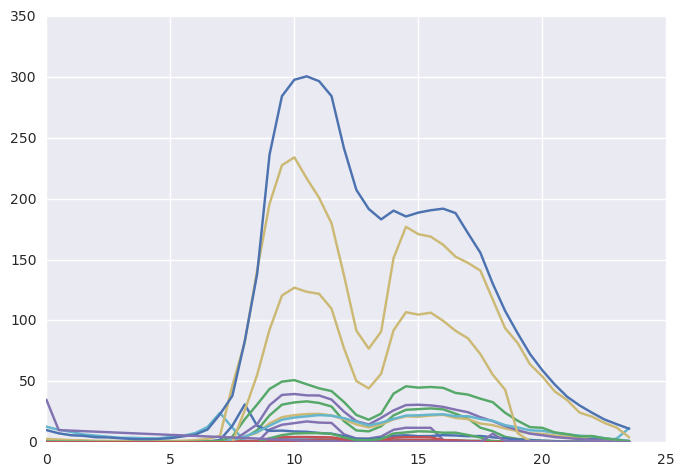

In [65]:
for cat in cats:
    data_cat = data[data['ASS_ASSIGNMENT'] == cat]
    day = 1
    data_cat = data_cat[data_cat['day_week'] == day]
    grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean()
    plt.plot(grouped)

In [134]:
data['time_absolut'].min(), data_cat['time_absolut'].max()

(1293836400.0, 1381698000.0)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


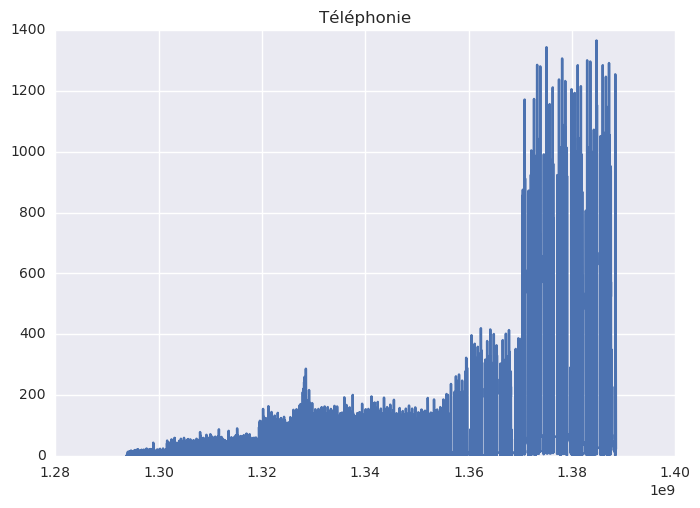

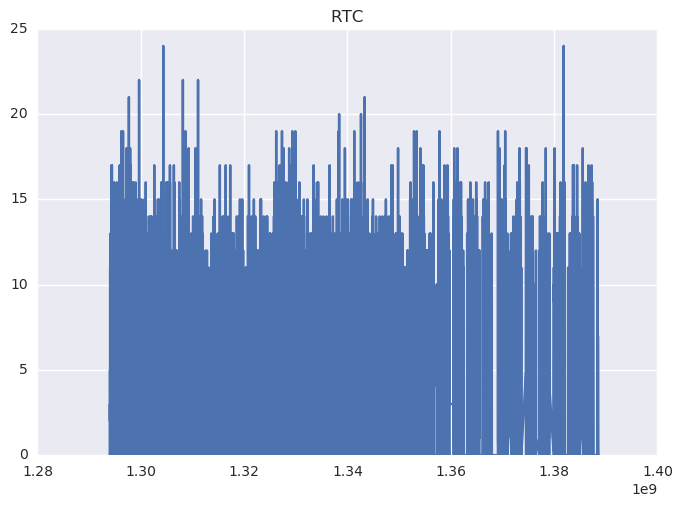

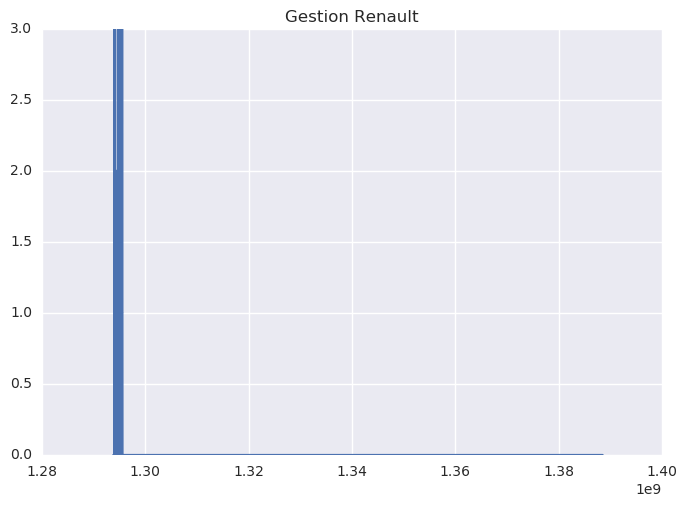

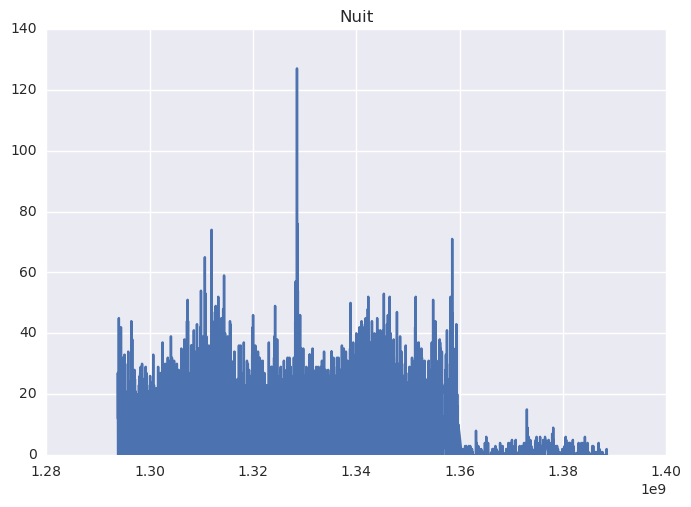

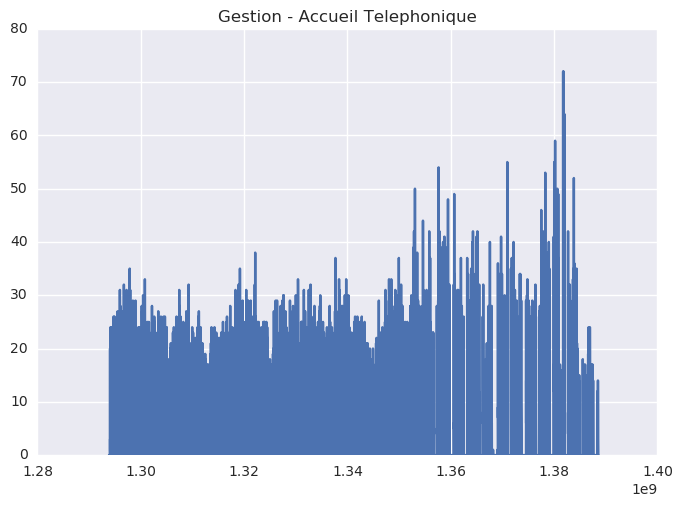

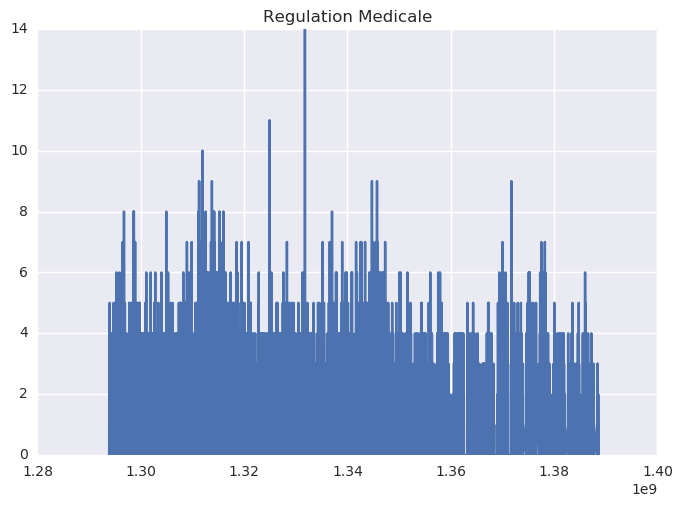

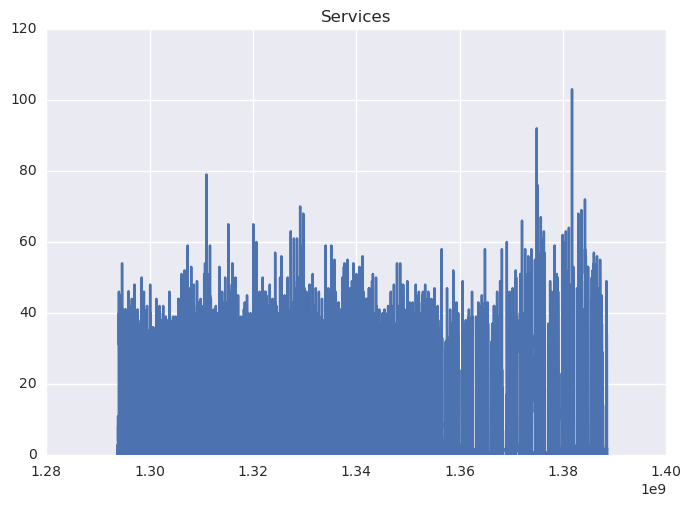

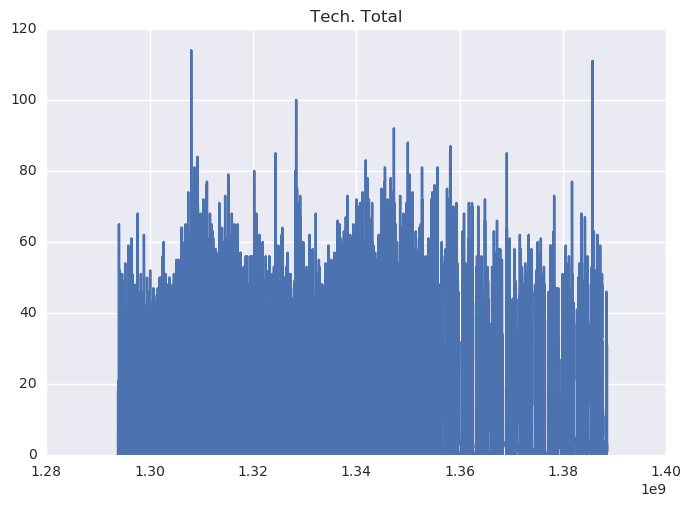

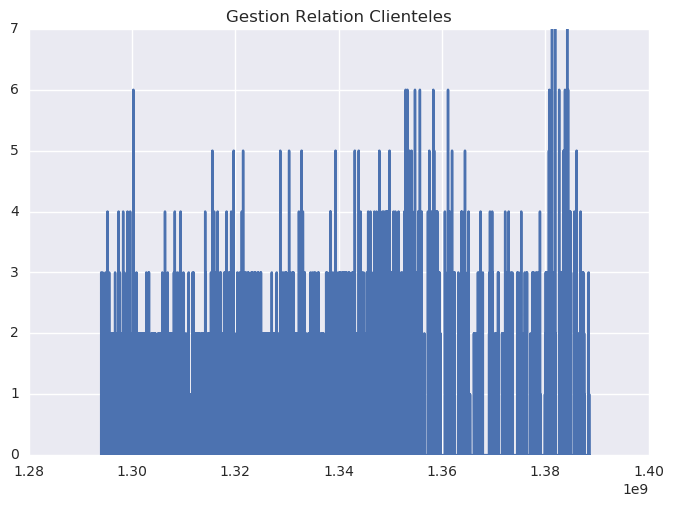

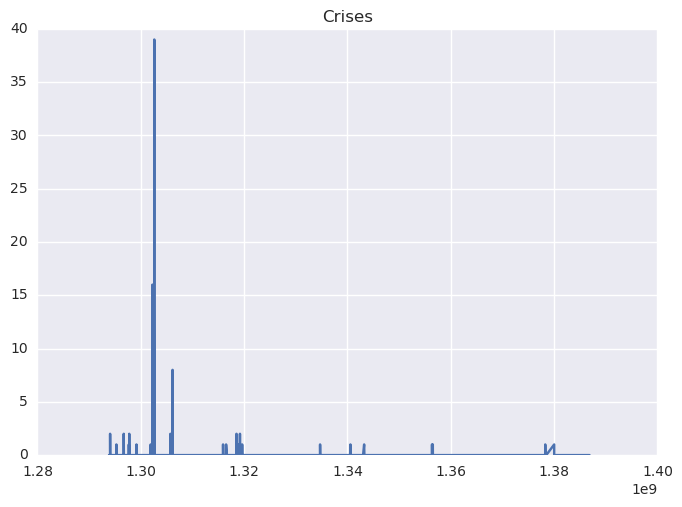

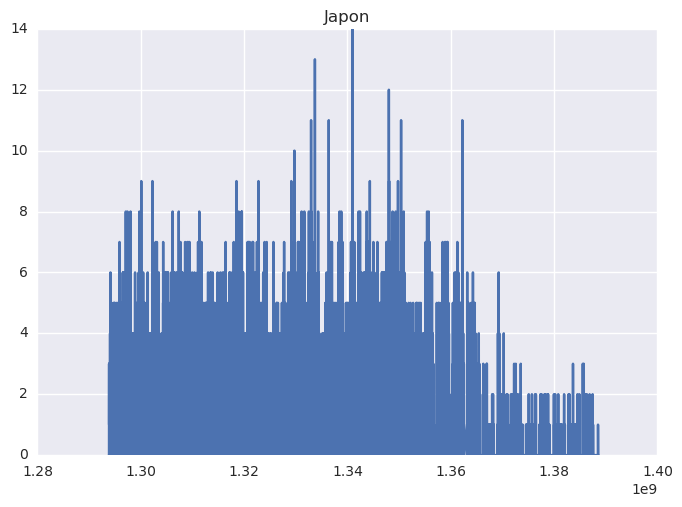

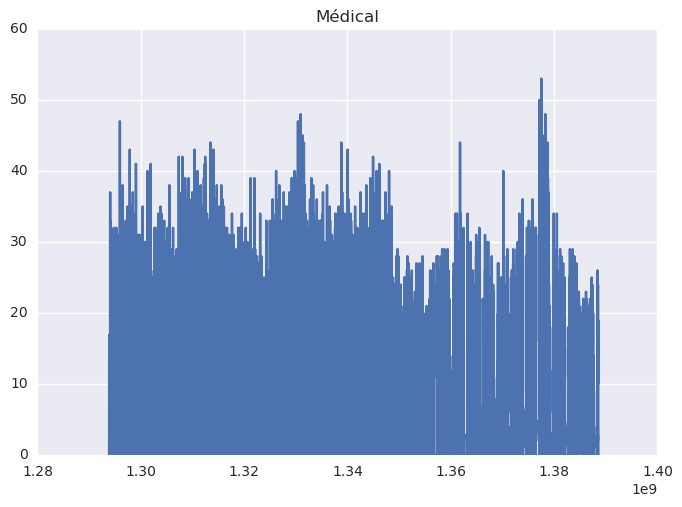

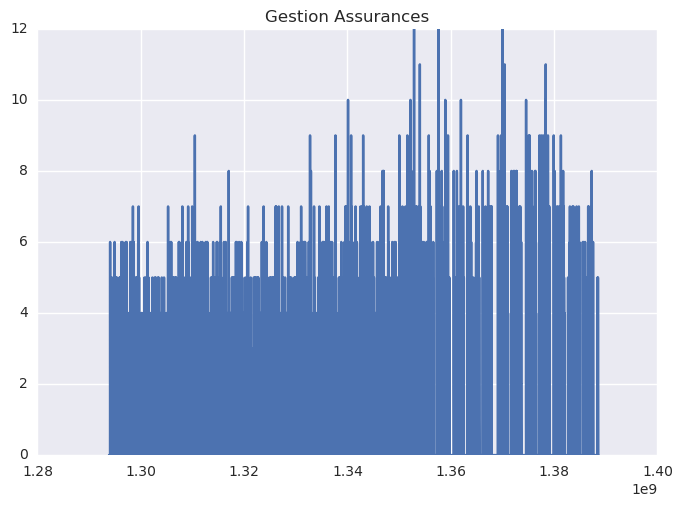

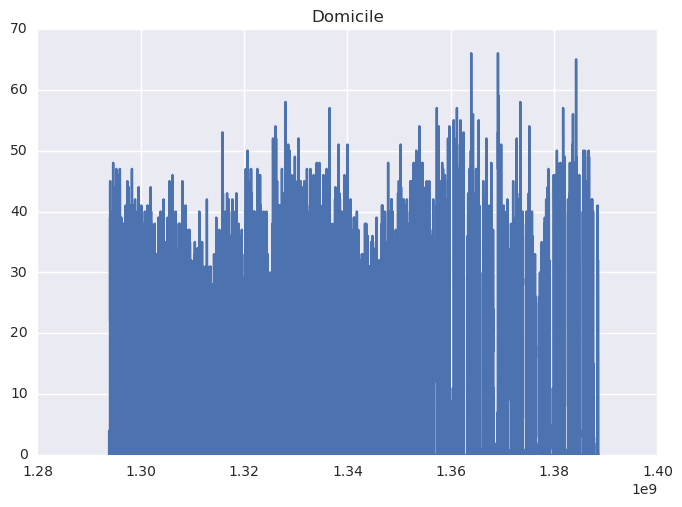

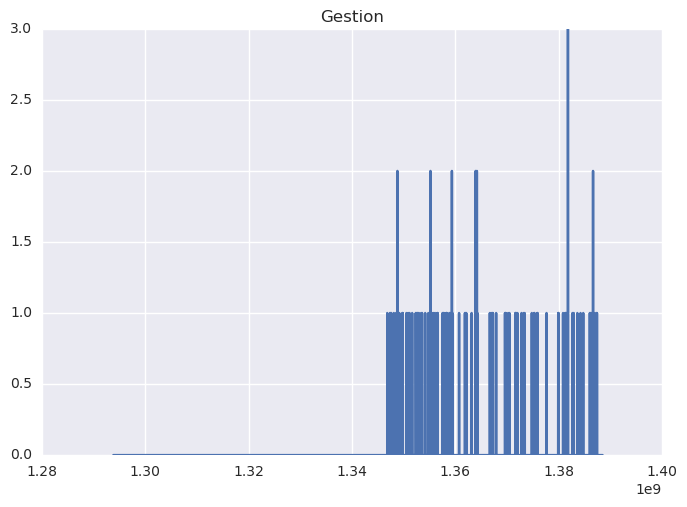

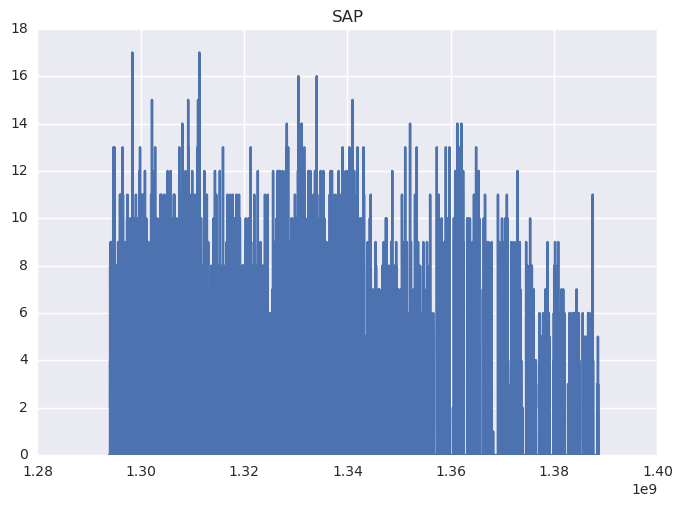

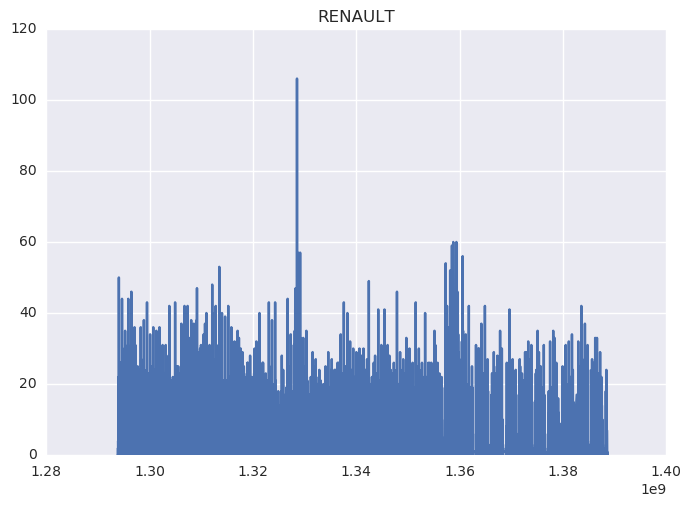

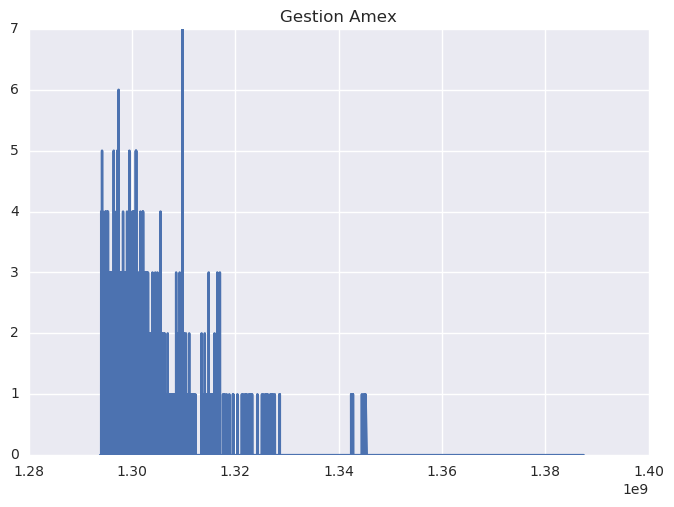

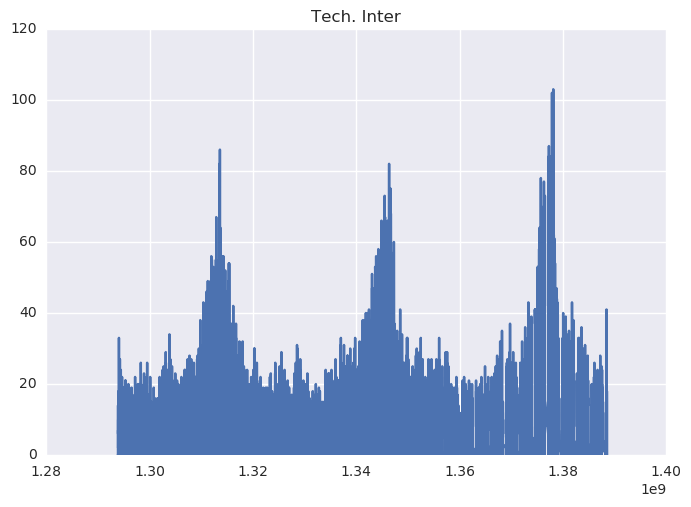

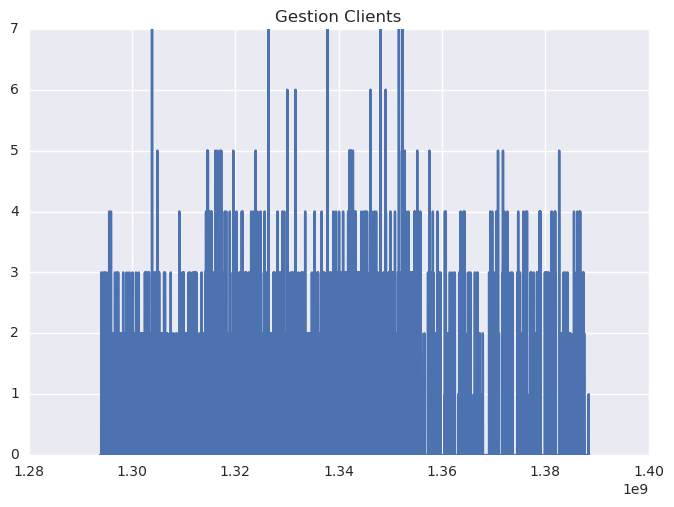

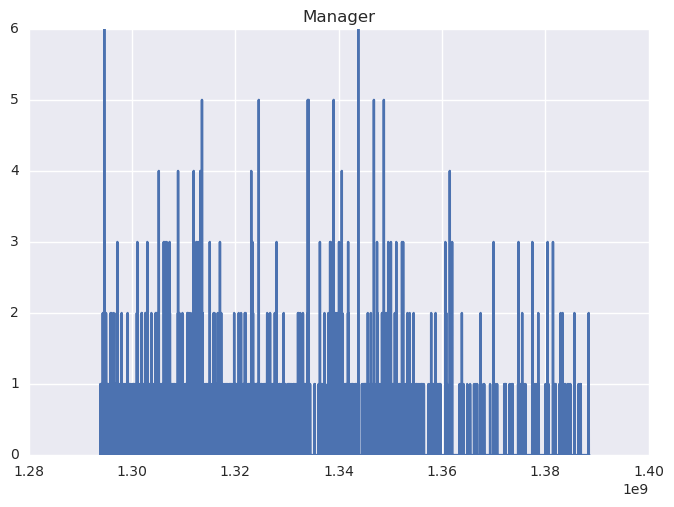

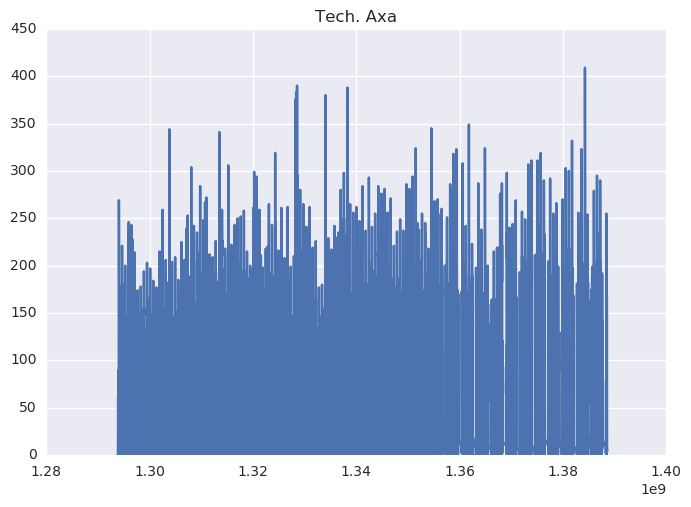

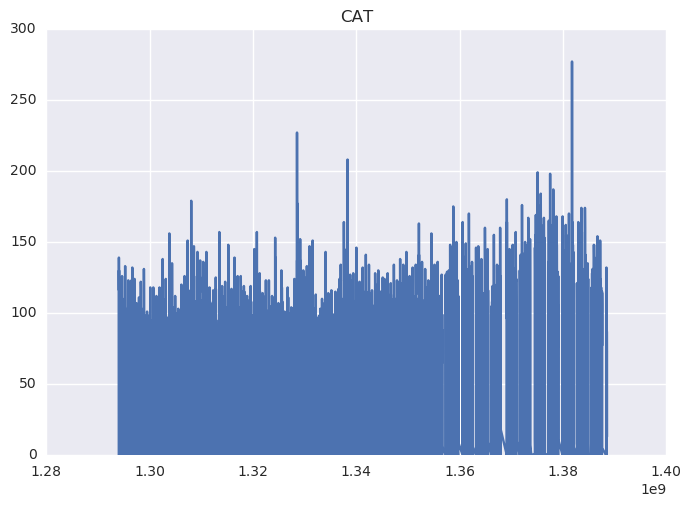

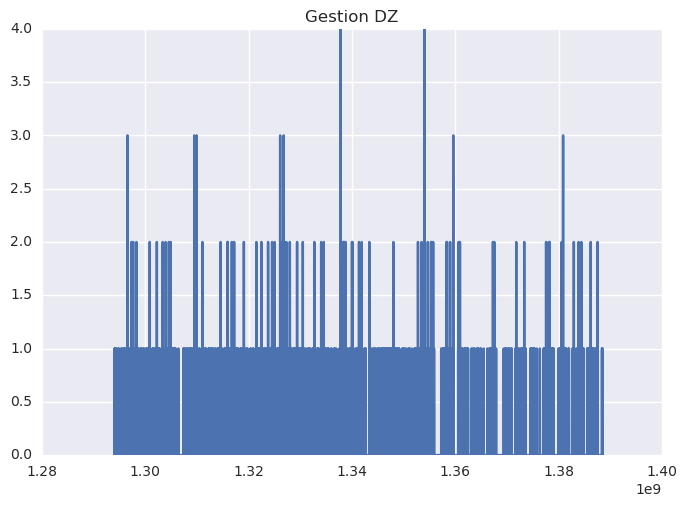

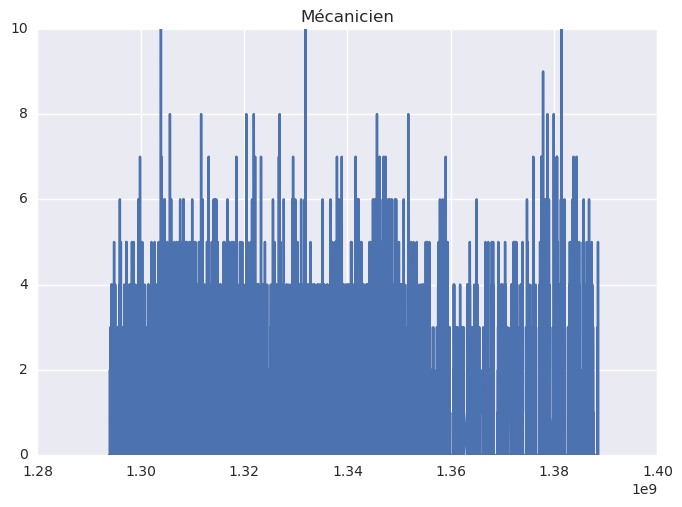

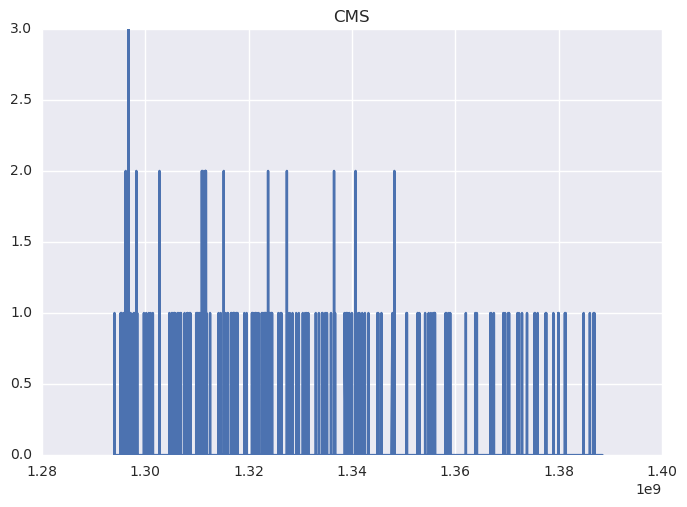

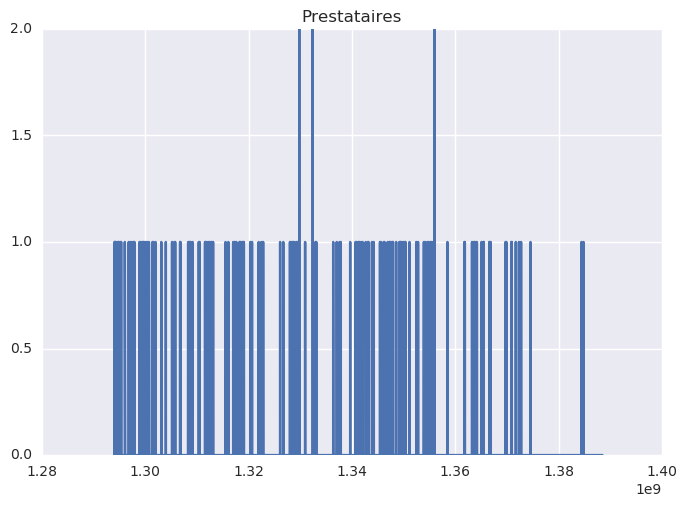

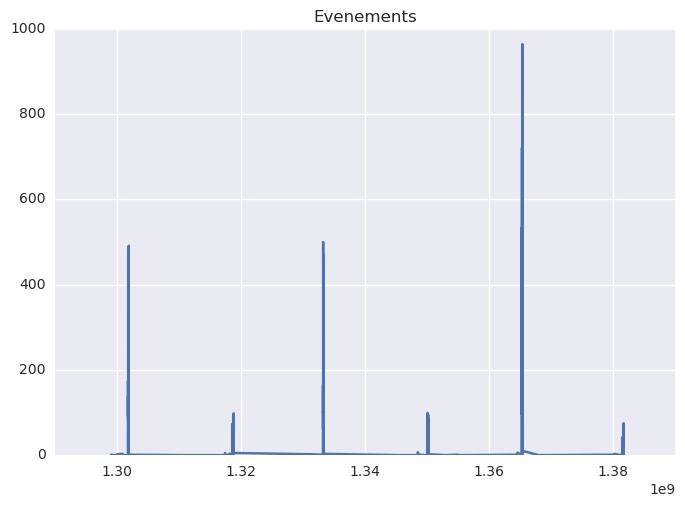

In [330]:
m = data['time_absolut'].max()
for cat in cats:
    data_cat = data[data['ASS_ASSIGNMENT'] == cat].sort(['time_absolut'])
    
    day = 15
#     data_cat = data_cat[data_cat['hours'] == day]
#     data_cat = data_cat[data_cat['time_absolut'] > m - 60*60*24*28]
#     grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean()
    plt.plot(data_cat['time_absolut'],data_cat['CSPL_RECEIVED_CALLS'])
    plt.title(cat)
    plt.show()

## find params for models for bad categories by crossvalidation

In [282]:
#tech axa
cat = 'CAT'
print(len(data[data['ASS_ASSIGNMENT'] == cat]))
start_time = time.time()
X = data[data['ASS_ASSIGNMENT'] == cat][indexes]
Y = data[data['ASS_ASSIGNMENT'] == cat]['CSPL_RECEIVED_CALLS']
#         model = xgb.XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=80, silent=False, 
#                                  objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
#                                  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)


41206


In [283]:
def scorerMult(est, X, y):
    return np.mean(eval_metric(est.predict(X)*(np.exp(-est.predict(X)/100)*5+1),y))

In [284]:
model = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None,
                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                      max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                      bootstrap=True, oob_score=False, n_jobs=-1,
                      random_state=None, verbose=0, warm_start=False)

#         model.fit(X,Y)
scores = cross_val_score(model,X,Y,scoring=scorerMult,cv=5)
print(scores)

[  1.79498203e+01   1.31675550e+17   8.23231755e+01   8.93702657e+00
   1.30174998e+01]


In [266]:
cat = 'Tech. Axa'
print(len(data[data['ASS_ASSIGNMENT'] == cat]))
start_time = time.time()
X = data[data['ASS_ASSIGNMENT'] == cat][indexes]
Y = data[data['ASS_ASSIGNMENT'] == cat]['CSPL_RECEIVED_CALLS']
#         model = xgb.XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=80, silent=False, 
#                                  objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
#                                  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)


416986


In [ ]:
[  3.49275059   6.96753244   7.29661279  11.69029872   4.17214527
   4.29744128   6.72934037   5.81668682   5.03439829   5.32960201]

In [274]:
def scorerMult2(est, X, y):
    return np.mean(eval_metric(est.predict(X)*(np.exp(-est.predict(X)/100)*10+1),y))

model = RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=None,
                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                      max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                      bootstrap=True, oob_score=False, n_jobs=-1,
                      random_state=None, verbose=0, warm_start=False)

#         model.fit(X,Y)
scores = cross_val_score(model,X,Y,scoring=scorerMult2,cv=10)
print(scores)

[ 3.49931328  6.9842676   7.30146076  8.49857923  4.17225472  4.31965288
  6.6513589   5.83673784  5.07396172  5.27543413]


------- now get params for **telephonie**

In [375]:
lim3 = 1.37*10**9 
data_sub1 = data[data['year'] == 2013]
data_sub1 = data_sub1[data_sub1['ASS_ASSIGNMENT'] == 'Téléphonie']
data_sub2 = data_sub1[data_sub1['time_absolut'] > lim3]
data_sub3 = data_sub1[data_sub1['time_absolut'] < lim3]

def get_max2(x):
    tmp = data_sub2.query('hours >= @x.hours -1 & hours <= @x.hours + 1 & day_week == @x.day_week')
    return tmp['CSPL_RECEIVED_CALLS'].max()

def get_max3(x):
    tmp = data_sub3.query('hours >= @x.hours -1 & hours <= @x.hours + 1 & day_week == @x.day_week')
    return tmp['CSPL_RECEIVED_CALLS'].max()

data_sub2['max_in_hour'] = data_sub2.apply(get_max2, axis=1)
data_sub3['max_in_hour'] = data_sub3.apply(get_max3, axis=1)

data_result = pd.concat((data_sub2, data_sub3))

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [377]:
data_result = pd.concat((data_sub2, data_sub3))
data_result

,hours,year,month,day_month,day_week,ASS_ASSIGNMENT,if_weekend,if_night,time,time_absolut,CSPL_RECEIVED_CALLS,max_in_hour
16293,0.0,2013.0,6,1,6,Téléphonie,1,0,"(2013, 6, 1, 0, 0, 0, 5, 152, -1)",1.370038e+09,8,94
16294,0.0,2013.0,6,2,0,Téléphonie,1,0,"(2013, 6, 2, 0, 0, 0, 6, 153, -1)",1.370124e+09,6,100
16304,0.0,2013.0,6,3,1,Téléphonie,0,0,"(2013, 6, 3, 0, 0, 0, 0, 154, -1)",1.370210e+09,8,80
16324,0.0,2013.0,6,4,2,Téléphonie,0,0,"(2013, 6, 4, 0, 0, 0, 1, 155, -1)",1.370297e+09,10,74
16345,0.0,2013.0,6,5,3,Téléphonie,0,0,"(2013, 6, 5, 0, 0, 0, 2, 156, -1)",1.370383e+09,22,63
16363,0.0,2013.0,6,6,4,Téléphonie,0,0,"(2013, 6, 6, 0, 0, 0, 3, 157, -1)",1.370470e+09,35,63
16382,0.0,2013.0,6,7,5,Téléphonie,0,0,"(2013, 6, 7, 0, 0, 0, 4, 158, -1)",1.370556e+09,30,79
16400,0.0,2013.0,6,8,6,Téléphonie,1,0,"(2013, 6, 8, 0, 0, 0, 5, 159, -1)",1.370642e+09,45,94
16418,0.0,2013.0,6,9,0,Téléphonie,1,0,"(2013, 6, 9, 0, 0, 0, 6, 160, -1)",1.370729e+09,38,100
16433,0.0,2013.0,6,10,1,Téléphonie,0,0,"(2013, 6, 10, 0, 0, 0, 0, 161, -1)",1.370815e+09,38,80


In [380]:
for i in range(100):
    tmp = data_result.sample(1000)
    print(np.mean(eval_metric(tmp['max_in_hour'], tmp['CSPL_RECEIVED_CALLS'])))

10.198307989
10.2893943759
10.0654299867
9.84127323114
9.06655748015
9.52897050323
9.84478921173
10.2540519844
10.0906401109
9.77798452295
9.93894477328
9.75303593916
9.27855608434
9.89041093888
10.0088211872
9.85483192158
10.0896058427
9.90714338093
9.76122331665
10.2749678134
9.86667927333
9.73277359226
9.68129225096
9.58545926901
10.8067391724
10.6617439305
9.19134009284
10.0911485994
10.0275305039
11.1214215958
9.21589008892
10.2446521292
8.93886832
10.2503596103
10.2226413177
9.98761763474
9.55412818532
10.1254365914
10.3594739324
9.50358639266
8.65023123259
9.69935597389
10.054208329
9.38916878108
9.64802249988
10.6866262787
9.30939361132
10.1947324039
9.31248708122
9.34718558354
9.55247621046
9.78994154567
9.40380630472
9.73797228282
10.1823304392
9.07810522977
9.67402672277
9.97457905958
9.80866749464
10.3378091737
9.65729719004
10.064932537
9.25986105181
8.89441700692
9.06346644755
9.98007060507
9.64233761926
9.67303200472
9.79191336575
9.95227193731
9.59650774134
10.104222502

In [364]:
from sklearn.linear_model import LinearRegression as ln 
from sklearn.ensemble import RandomForestRegressor as rf 
#from sklearn.ensemble import RandomForestClassifier as rf 
from sklearn.cross_validation import train_test_split 
from scipy.interpolate import interp1d 

data_cat = data[data['ASS_ASSIGNMENT'] == 'Téléphonie'] 
indexes = ['hours','year','month','day_month','day_week','if_weekend','if_night'] 
dummies = ['day_week', 'month', 'ASS_ASSIGNMENT'] 
# for d in dummies: 
#     data_cat = pd.concat((data_cat, pd.get_dummies(data_cat[d])),axis=1) 
# for val in data_cat[d].unique(): 
#     indexes.append(val) 

metric_tel={} 

lim3 = 1.37*np.power(10, 9) 
lim2 = 1.36*np.power(10, 9) 
lim1 = 1.356*np.power(10, 9) 
data_Tel1 = data_cat[data_cat['time_absolut']<=lim2] 
data_Tel1 = data_Tel1[data_Tel1['time_absolut']>lim1] 
data_Tel2 = data_cat[data_cat['time_absolut']<=lim3] 
data_Tel2 = data_Tel2[data_Tel2['time_absolut']>lim2] 
data_Tel3 = data_cat[data_cat['time_absolut']>lim3] 

### data_Tel1 
X = data_Tel1['time_absolut'] 
Y = data_Tel1['CSPL_RECEIVED_CALLS'] 
X_train, X_test, y_train, y_test = train_test_split(X,Y) 
model_ln = ln() 
model_ln.fit(np.transpose(np.matrix(X_train)), np.transpose(np.matrix(y_train))) 
#model_ln.fit(X_train, y_train) 
pred = model_ln.predict(np.transpose(np.matrix(X_test))) 
#pred = model_ln.predict(X_test) 
pred = np.round(pred) 
metric_tel['Tel1'] = np.mean(eval_metric(pred.reshape(1,pred.shape[0])[0], y_test)) 

### data_Tel2 
p=300 
pred2 = np.round((Y-k).mean()*1.5)+k 
metric_tel['Tel2'] = np.mean(eval_metric(pred2, y_test)) 

### data_Tel3 
k=800 
X = data_Tel3[['time_absolut', 'hours', 'day_week', 'CSPL_RECEIVED_CALLS']] 
Y = data_Tel3['CSPL_RECEIVED_CALLS'] 


d = pd.DataFrame(X.groupby(['day_week', 'hours'])['CSPL_RECEIVED_CALLS'].max())
d.reset_index(level=0, inplace=True)
d.reset_index(level=0, inplace=True)
data = d



X = X.merge(d,on=['day_week','hours'], how ='left', sort=False)
X
#X = data.rename(index=str,  columns={'CSPL_RECEIVED_CALLS_x' : 'mean_week_ASS'})
#X = data.rename(index=str,  columns={'CSPL_RECEIVED_CALLS_y' : 'CSPL_RECEIVED_CALLS'})

#pred3 =  

#X_train, X_test, y_train, y_test = train_test_split(X,Y) 
#pred3 = Y.max()
#pred3 = np.round((Y-k).mean()*0.5)+k 
#metric_tel['Tel3'] = np.mean(eval_metric(pred3, y_test)) 


def model_Tel(x): 
    if x['time_absolut']<=lim2 and x['time_absolut']>lim1 : 
        return model_ln.predict(x['time_absolut']) 
    if x['time_absolut']<=lim3 and x['time_absolut']>lim2 : 
        return pred2 
    if x['time_absolut']>lim3 : 
        return pred3

In [356]:
metric_tel

{'Tel1': 83182676.683068648,
 'Tel2': 1.1098414805802528e+25,
 'Tel3': 1.7756502790542928e+29}

In [310]:
cat = 'Téléphonie'
print(len(data[data['ASS_ASSIGNMENT'] == cat]))
start_time = time.time()

dat = data[data['ASS_ASSIGNMENT'] == cat]
dat = dat[dat['year'] == 2013]
print(len(dat))

X = dat[dat['ASS_ASSIGNMENT'] == cat][indexes]
Y = dat[dat['ASS_ASSIGNMENT'] == cat]['CSPL_RECEIVED_CALLS']
#         model = xgb.XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=80, silent=False, 
#                                  objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
#                                  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)


7387175
4239116


In [335]:
dat['pred_tmp'] = dat.apply(model_Tel,axis=1)

In [334]:
#evaluate 10 random splits
for i in range(1):
    dat_sub = dat.sample(10000)
    print(eval_metric(dat_sum['pred_tmp'],dat_sum['CSPL_RECEIVED_CALLS']).mean())

KeyboardInterrupt: 

In [ ]:
data_cat = data[data['ASS_ASSIGNMENT'] == 'Téléphonie']
data_cat = data_cat[data_cat['year'] == 2013]
  
Y = data_cat['CSPL_RECEIVED_CALLS']
X = data_cat['time_absolut']
k=150
pred1 = np.round((Y-k).mean()*1.5)+k

def model_Tele2(x):
    return pred1

In [313]:
def scorerIra(est, X, y):
    y_pred = y
    y_pred = model_Tele2(0)
    return np.mean(eval_metric(y_pred*10,y))
scores = cross_val_score(model,X,Y,scoring=scorerIra)

print(scores)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python3.4/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    165         sys.exit(msg)
    166     main_globals = sys.modules["__main__"].__dict__
    167     if alter_argv:
    168         sys.argv[0] = mod_spec.origin
    169     return _run_code(code, main_globals, None,
--> 170                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.4/dist-packages/ipykernel/__main__.py')
    171 
    172 def run_module(mod_name, init_globals=None,
    173                run_name=None, alter_sys=False):
    174     """Execute a module's code without importing it

...........................................................................
/usr/lib/python3.4/runpy.py in _run_code(code=<code object <module> at 0x7f7272302300, file "/...3.4/dist-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/local/lib/python3.4/dist-packages/ipykernel/__pycache__/__main__.cpython-34.pyc', '__doc__': None, '__file__': '/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.4/dist-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python3.4/dist-packages/ipykernel/kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.4/dist-packages/ipykernel/__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f7272302300, file "/...3.4/dist-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/local/lib/python3.4/dist-packages/ipykernel/__pycache__/__main__.cpython-34.pyc', '__doc__': None, '__file__': '/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.4/dist-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python3.4/dist-packages/ipykernel/kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/usr/local/lib/python3.4/dist-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/local/lib/python3.4/dist-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/usr/local/lib/python3.4/dist-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 5
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 5), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 5)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=5)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'def scorerIra(est, X, y):\n    y_pred = y\n    y_p...score(model,X,Y,scoring=scorerIra)\n\nprint(scores)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-12-09T15:22:06.663211', 'msg_id': 'EDE1A2BC1CD545FFBE11B3B313092099', 'msg_type': 'execute_request', 'session': 'F89B316A7DA84A068D5901B0A5B2D7F0', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'EDE1A2BC1CD545FFBE11B3B313092099', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'F89B316A7DA84A068D5901B0A5B2D7F0']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'def scorerIra(est, X, y):\n    y_pred = y\n    y_p...score(model,X,Y,scoring=scorerIra)\n\nprint(scores)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-12-09T15:22:06.663211', 'msg_id': 'EDE1A2BC1CD545FFBE11B3B313092099', 'msg_type': 'execute_request', 'session': 'F89B316A7DA84A068D5901B0A5B2D7F0', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'EDE1A2BC1CD545FFBE11B3B313092099', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'F89B316A7DA84A068D5901B0A5B2D7F0'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'def scorerIra(est, X, y):\n    y_pred = y\n    y_p...score(model,X,Y,scoring=scorerIra)\n\nprint(scores)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-12-09T15:22:06.663211', 'msg_id': 'EDE1A2BC1CD545FFBE11B3B313092099', 'msg_type': 'execute_request', 'session': 'F89B316A7DA84A068D5901B0A5B2D7F0', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'EDE1A2BC1CD545FFBE11B3B313092099', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='def scorerIra(est, X, y):\n    y_pred = y\n    y_p...score(model,X,Y,scoring=scorerIra)\n\nprint(scores)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'def scorerIra(est, X, y):\n    y_pred = y\n    y_p...score(model,X,Y,scoring=scorerIra)\n\nprint(scores)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('def scorerIra(est, X, y):\n    y_pred = y\n    y_p...score(model,X,Y,scoring=scorerIra)\n\nprint(scores)',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('def scorerIra(est, X, y):\n    y_pred = y\n    y_p...score(model,X,Y,scoring=scorerIra)\n\nprint(scores)',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='def scorerIra(est, X, y):\n    y_pred = y\n    y_p...score(model,X,Y,scoring=scorerIra)\n\nprint(scores)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.FunctionDef object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-313-8dd28f870c6d>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f71c5215550, executi..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f713c2410c0, file "<ipython-input-313-8dd28f870c6d>", line 5>
        result = <ExecutionResult object at 7f71c5215550, executi..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f713c2410c0, file "<ipython-input-313-8dd28f870c6d>", line 5>, result=<ExecutionResult object at 7f71c5215550, executi..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f713c2410c0, file "<ipython-input-313-8dd28f870c6d>", line 5>
        self.user_global_ns = {'In': ['', 'import pandas as pd\nimport numpy as np\nget_ipyth...rt matplotlib.pyplot as plt\nimport seaborn as sbn', "### Decide about the features to take according ...=['DATE','ASS_ASSIGNMENT','CSPL_RECEIVED_CALLS'])", "subm_data = pd.read_table('calls_Irina/submission.txt')", "import pickle\npickle.dump(data, open('data.pkl','wb'))", "import time\ndata['time'] = data['DATE'].apply(la...bda x: time.strptime(x, '%Y-%m-%d %H:%M:%S.000'))", "data['day_week'] = data['time'].apply(lambda x: ...ly(lambda x: 1 if x >= 7.5 and x <= 23.5 else 0) ", "d = data.groupby(['hours','year','month','day_mo...lse)['CSPL_RECEIVED_CALLS'].sum()\ndata_merged = d", 'data[\'day_week\'] = data[\'time\'].apply(lambda x: ..., x))+np.sign(float(time.strftime("%M", x)))*0.5)', "import pickle\npickle.dump(data, open('data.pkl',...ickle.dump(subm_data, open('subm_data.pkl','wb'))", "d = data.groupby(['hours','year','month','day_mo...lse)['CSPL_RECEIVED_CALLS'].sum()\ndata_merged = d", "pickle.dump(data_merged, open('data_merged.pkl','wb'))\ndata = data_merged", 'data', 'import time\nimport xgboost as xgb\nfrom tqdm impo...--- %s seconds ---" % (time.time() - start_time))', "cats = data['ASS_ASSIGNMENT'].unique()", 'import time\nimport xgboost as xgb\nfrom tqdm impo...--- %s seconds ---" % (time.time() - start_time))', 'data = data.sample(10000)', 'import time\nimport xgboost as xgb\nfrom tqdm impo...--- %s seconds ---" % (time.time() - start_time))', "from scipy.interpolate import interp1d\n\nmodel_ye...='best')\n    plt.show()\n    model_year[year] = f2", 'data', ...], 'Out': {12:          hours    year  month  day_month  day_we...                 23  

[1030829 rows x 9 columns], 19:          hours    year  month  day_month  day_we...                    3  

[10000 rows x 9 columns], 23:          hours    year  month  day_month  day_we...                23  

[1030832 rows x 11 columns], 64:                           DATE                  ...         1      44.0  

[82909 rows x 13 columns], 66:                           DATE                  ...         1      44.0  

[82909 rows x 13 columns], 67: <matplotlib.axes._subplots.AxesSubplot object>, 68:                           DATE                  ...         1      44.0  

[82909 rows x 13 columns], 70:                           DATE                  ...         0      44.0  

[82909 rows x 15 columns], 71:        prediction  prediction
0               0 ...          0        44.0

[82909 rows x 2 columns], 75:                           DATE                  ...         0      44.0  

[82909 rows x 15 columns], ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'X': 5678017     1.361666e+09
5678018     1.361666e+0...  1.380317e+09
Name: time_absolut, dtype: float64, 'X_test': 8936813     1.387330e+09
7256700     1.372219e+0...  1.383300e+09
Name: time_absolut, dtype: float64, 'X_train': 7791292     1.377857e+09
9636945     1.379750e+0...  1.377848e+09
Name: time_absolut, dtype: float64, 'Y': 5678017     0
5678018     0
5678019     0
567802...8469    2
Name: CSPL_RECEIVED_CALLS, dtype: int64, '_': ['hours', 'year', 'month', 'day_month', 'day_week', 'if_weekend', 'if_night', 'Téléphonie'], '_100': <matplotlib.axes._subplots.AxesSubplot object>, '_12':          hours    year  month  day_month  day_we...                 23  

[1030829 rows x 9 columns], ...}
        self.user_ns = {'In': ['', 'import pandas as pd\nimport numpy as np\nget_ipyth...rt matplotlib.pyplot as plt\nimport seaborn as sbn', "### Decide about the features to take according ...=['DATE','ASS_ASSIGNMENT','CSPL_RECEIVED_CALLS'])", "subm_data = pd.read_table('calls_Irina/submission.txt')", "import pickle\npickle.dump(data, open('data.pkl','wb'))", "import time\ndata['time'] = data['DATE'].apply(la...bda x: time.strptime(x, '%Y-%m-%d %H:%M:%S.000'))", "data['day_week'] = data['time'].apply(lambda x: ...ly(lambda x: 1 if x >= 7.5 and x <= 23.5 else 0) ", "d = data.groupby(['hours','year','month','day_mo...lse)['CSPL_RECEIVED_CALLS'].sum()\ndata_merged = d", 'data[\'day_week\'] = data[\'time\'].apply(lambda x: ..., x))+np.sign(float(time.strftime("%M", x)))*0.5)', "import pickle\npickle.dump(data, open('data.pkl',...ickle.dump(subm_data, open('subm_data.pkl','wb'))", "d = data.groupby(['hours','year','month','day_mo...lse)['CSPL_RECEIVED_CALLS'].sum()\ndata_merged = d", "pickle.dump(data_merged, open('data_merged.pkl','wb'))\ndata = data_merged", 'data', 'import time\nimport xgboost as xgb\nfrom tqdm impo...--- %s seconds ---" % (time.time() - start_time))', "cats = data['ASS_ASSIGNMENT'].unique()", 'import time\nimport xgboost as xgb\nfrom tqdm impo...--- %s seconds ---" % (time.time() - start_time))', 'data = data.sample(10000)', 'import time\nimport xgboost as xgb\nfrom tqdm impo...--- %s seconds ---" % (time.time() - start_time))', "from scipy.interpolate import interp1d\n\nmodel_ye...='best')\n    plt.show()\n    model_year[year] = f2", 'data', ...], 'Out': {12:          hours    year  month  day_month  day_we...                 23  

[1030829 rows x 9 columns], 19:          hours    year  month  day_month  day_we...                    3  

[10000 rows x 9 columns], 23:          hours    year  month  day_month  day_we...                23  

[1030832 rows x 11 columns], 64:                           DATE                  ...         1      44.0  

[82909 rows x 13 columns], 66:                           DATE                  ...         1      44.0  

[82909 rows x 13 columns], 67: <matplotlib.axes._subplots.AxesSubplot object>, 68:                           DATE                  ...         1      44.0  

[82909 rows x 13 columns], 70:                           DATE                  ...         0      44.0  

[82909 rows x 15 columns], 71:        prediction  prediction
0               0 ...          0        44.0

[82909 rows x 2 columns], 75:                           DATE                  ...         0      44.0  

[82909 rows x 15 columns], ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'X': 5678017     1.361666e+09
5678018     1.361666e+0...  1.380317e+09
Name: time_absolut, dtype: float64, 'X_test': 8936813     1.387330e+09
7256700     1.372219e+0...  1.383300e+09
Name: time_absolut, dtype: float64, 'X_train': 7791292     1.377857e+09
9636945     1.379750e+0...  1.377848e+09
Name: time_absolut, dtype: float64, 'Y': 5678017     0
5678018     0
5678019     0
567802...8469    2
Name: CSPL_RECEIVED_CALLS, dtype: int64, '_': ['hours', 'year', 'month', 'day_month', 'day_week', 'if_weekend', 'if_night', 'Téléphonie'], '_100': <matplotlib.axes._subplots.AxesSubplot object>, '_12':          hours    year  month  day_month  day_we...                 23  

[1030829 rows x 9 columns], ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/home/alogins/<ipython-input-313-8dd28f870c6d> in <module>()
      1 
      2 def scorerIra(est, X, y):
      3     y_pred = y
      4     y_pred = model_Tele2(0)
----> 5     return np.mean(eval_metric(y_pred*10,y))
      6 scores = cross_val_score(model,X,Y,scoring=scorerIra)
      7 
      8 print(scores)
      9 
     10 

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py in cross_val_score(estimator=RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False), X=5678017     1.361666e+09
5678018     1.361666e+0...  1.380317e+09
Name: time_absolut, dtype: float64, y=5678017     0
5678018     0
5678019     0
567802...8469    2
Name: CSPL_RECEIVED_CALLS, dtype: int64, scoring=<function scorerIra>, cv=sklearn.cross_validation.KFold(n=4239116, n_folds=3, shuffle=False, random_state=None), n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
   1566     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
   1567                         pre_dispatch=pre_dispatch)
   1568     scores = parallel(delayed(_fit_and_score)(clone(estimator), X, y, scorer,
   1569                                               train, test, verbose, None,
   1570                                               fit_params)
-> 1571                       for train, test in cv)
        cv = sklearn.cross_validation.KFold(n=4239116, n_folds=3, shuffle=False, random_state=None)
   1572     return np.array(scores)[:, 0]
   1573 
   1574 
   1575 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object <genexpr>>)
    753         self.n_completed_tasks = 0
    754         try:
    755             # Only set self._iterating to True if at least a batch
    756             # was dispatched. In particular this covers the edge
    757             # case of Parallel used with an exhausted iterator.
--> 758             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object <genexpr>>
    759                 self._iterating = True
    760             else:
    761                 self._iterating = False
    762 

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object <genexpr>>)
    603             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    604             if len(tasks) == 0:
    605                 # No more tasks available in the iterator: tell caller to stop.
    606                 return False
    607             else:
--> 608                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    609                 return True
    610 
    611     def _print(self, msg, msg_args):
    612         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    566         self.n_dispatched_tasks += len(batch)
    567         self.n_dispatched_batches += 1
    568 
    569         dispatch_timestamp = time.time()
    570         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 571         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    572         self._jobs.append(job)
    573 
    574     def dispatch_next(self):
    575         """Dispatch more data for parallel processing

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    104             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    105         return 1
    106 
    107     def apply_async(self, func, callback=None):
    108         """Schedule a func to be run"""
--> 109         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    110         if callback:
    111             callback(result)
    112         return result
    113 

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    321 
    322 class ImmediateResult(object):
    323     def __init__(self, batch):
    324         # Don't delay the application, to avoid keeping the input
    325         # arguments in memory
--> 326         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    327 
    328     def get(self):
    329         return self.results
    330 

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False), 5678017     1.361666e+09
5678018     1.361666e+0...  1.380317e+09
Name: time_absolut, dtype: float64, 5678017     0
5678018     0
5678019     0
567802...8469    2
Name: CSPL_RECEIVED_CALLS, dtype: int64, <function scorerIra>, array([1413039, 1413040, 1413041, ..., 4239113, 4239114, 4239115]), array([      0,       1,       2, ..., 1413036, 1413037, 1413038]), 0, None, None), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False), 5678017     1.361666e+09
5678018     1.361666e+0...  1.380317e+09
Name: time_absolut, dtype: float64, 5678017     0
5678018     0
5678019     0
567802...8469    2
Name: CSPL_RECEIVED_CALLS, dtype: int64, <function scorerIra>, array([1413039, 1413040, 1413041, ..., 4239113, 4239114, 4239115]), array([      0,       1,       2, ..., 1413036, 1413037, 1413038]), 0, None, None)
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py in _fit_and_score(estimator=RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False), X=5678017     1.361666e+09
5678018     1.361666e+0...  1.380317e+09
Name: time_absolut, dtype: float64, y=5678017     0
5678018     0
5678019     0
567802...8469    2
Name: CSPL_RECEIVED_CALLS, dtype: int64, scorer=<function scorerIra>, train=array([1413039, 1413040, 1413041, ..., 4239113, 4239114, 4239115]), test=array([      0,       1,       2, ..., 1413036, 1413037, 1413038]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, error_score='raise')
   1660 
   1661     try:
   1662         if y_train is None:
   1663             estimator.fit(X_train, **fit_params)
   1664         else:
-> 1665             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method RandomForestRegressor.fit of Rando...te=None,
           verbose=0, warm_start=False)>
        X_train = 7540266     1.372144e+09
7540267     1.372144e+0...  1.380317e+09
Name: time_absolut, dtype: float64
        y_train = 7540266      1
7540267      0
7540268      0
754...469     2
Name: CSPL_RECEIVED_CALLS, dtype: int64
        fit_params = {}
   1666 
   1667     except Exception as e:
   1668         if error_score == 'raise':
   1669             raise

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/ensemble/forest.py in fit(self=RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False), X=array([[  1.37214362e+09,   1.37214362e+09,   1.....38031744e+09,   1.38031744e+09]], dtype=float32), y=array([[ 1.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 9.],
       [ 2.]]), sample_weight=None)
    321             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    322                              backend="threading")(
    323                 delayed(_parallel_build_trees)(
    324                     t, self, X, y, sample_weight, i, len(trees),
    325                     verbose=self.verbose, class_weight=self.class_weight)
--> 326                 for i, t in enumerate(trees))
        i = 0
    327 
    328             # Collect newly grown trees
    329             self.estimators_.extend(trees)
    330 

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Dec  9 15:22:10 2016
PID: 2984                                    Python 3.4.3: /usr/bin/python3
...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeRegressor(criterion='mse', max_depth...         random_state=895119751, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False), array([[  1.37214362e+09,   1.37214362e+09,   1.....38031744e+09,   1.38031744e+09]], dtype=float32), array([[ 1.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 9.],
       [ 2.]]), None, 0, 1), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeRegressor(criterion='mse', max_depth...         random_state=895119751, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False), array([[  1.37214362e+09,   1.37214362e+09,   1.....38031744e+09,   1.38031744e+09]], dtype=float32), array([[ 1.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 9.],
       [ 2.]]), None, 0, 1)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=DecisionTreeRegressor(criterion='mse', max_depth...         random_state=895119751, splitter='best'), forest=RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False), X=array([[  1.37214362e+09,   1.37214362e+09,   1.....38031744e+09,   1.38031744e+09]], dtype=float32), y=array([[ 1.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 9.],
       [ 2.]]), sample_weight=None, tree_idx=0, n_trees=1, verbose=0, class_weight=None)
    115                 warnings.simplefilter('ignore', DeprecationWarning)
    116                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    117         elif class_weight == 'balanced_subsample':
    118             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    119 
--> 120         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeRegressor.fit of Decis...        random_state=895119751, splitter='best')>
        X = array([[  1.37214362e+09,   1.37214362e+09,   1.....38031744e+09,   1.38031744e+09]], dtype=float32)
        y = array([[ 1.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 9.],
       [ 2.]])
        sample_weight = None
        curr_sample_weight = array([ 1.])
    121     else:
    122         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    123 
    124     return tree

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...         random_state=895119751, splitter='best'), X=array([[  1.37214362e+09,   1.37214362e+09,   1.....38031744e+09,   1.38031744e+09]], dtype=float32), y=array([[ 1.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 9.],
       [ 2.]]), sample_weight=array([ 1.]), check_input=False, X_idx_sorted=None)
   1024 
   1025         super(DecisionTreeRegressor, self).fit(
   1026             X, y,
   1027             sample_weight=sample_weight,
   1028             check_input=check_input,
-> 1029             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1030         return self
   1031 
   1032 
   1033 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...         random_state=895119751, splitter='best'), X=array([[  1.37214362e+09,   1.37214362e+09,   1.....38031744e+09,   1.38031744e+09]], dtype=float32), y=array([[ 1.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 9.],
       [ 2.]]), sample_weight=array([ 1.]), check_input=False, X_idx_sorted=None)
    235 
    236         self.max_features_ = max_features
    237 
    238         if len(y) != n_samples:
    239             raise ValueError("Number of labels=%d does not match "
--> 240                              "number of samples=%d" % (len(y), n_samples))
        y = array([[ 1.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 9.],
       [ 2.]])
        n_samples = 1
    241         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    242             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    243         if max_depth <= 0:
    244             raise ValueError("max_depth must be greater than zero. ")

ValueError: Number of labels=2826077 does not match number of samples=1
___________________________________________________________________________

 ---- some more data analysis

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


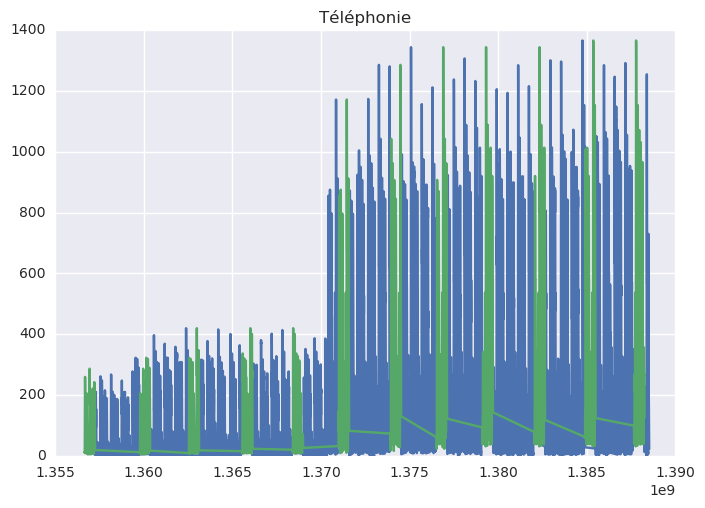

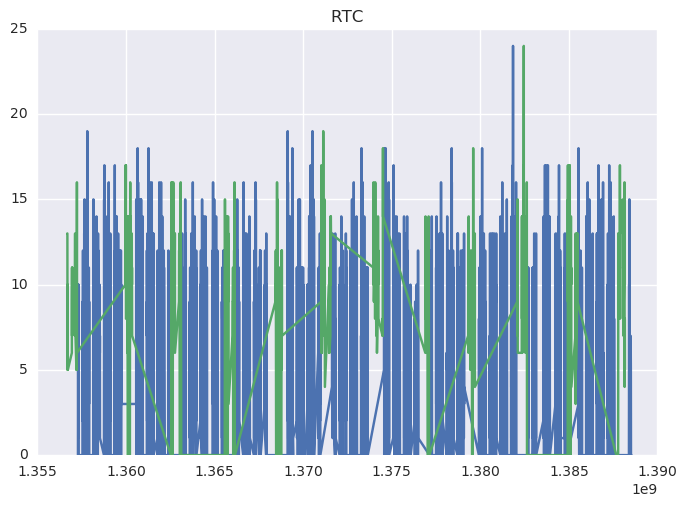

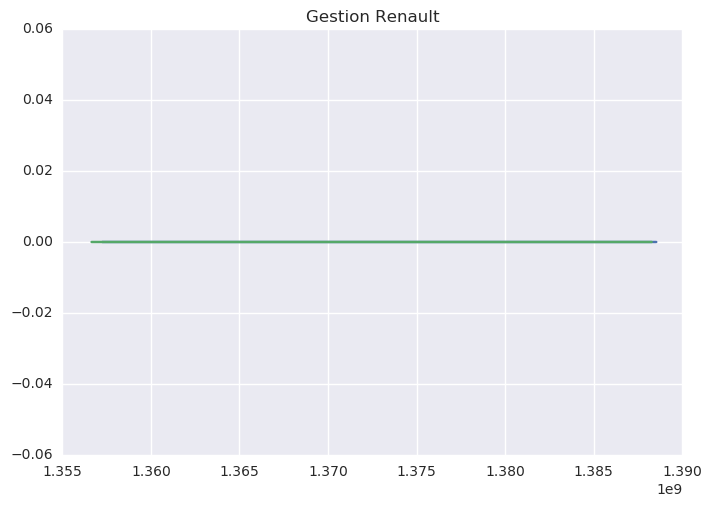

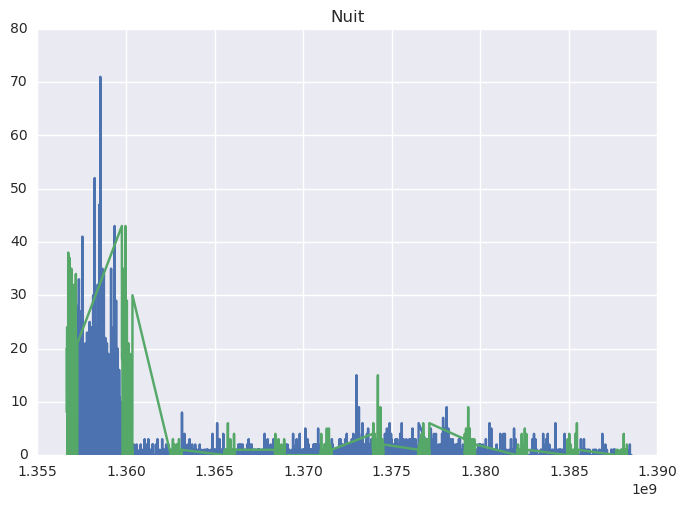

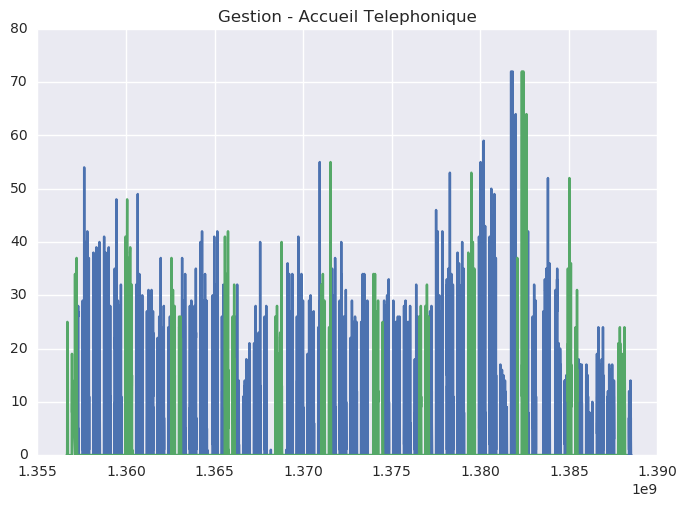

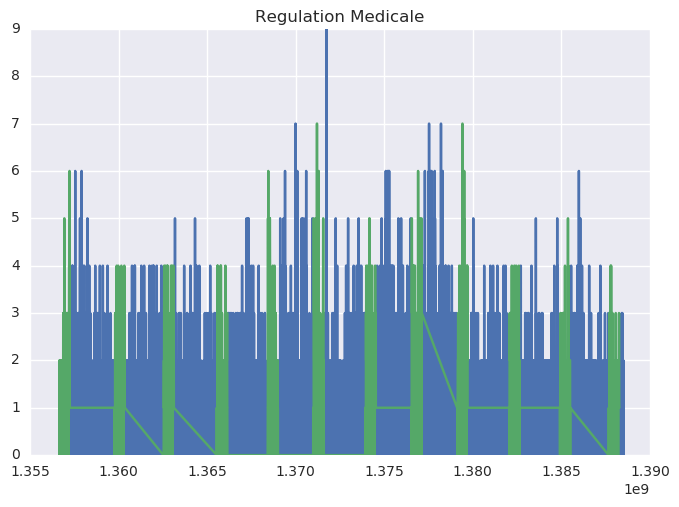

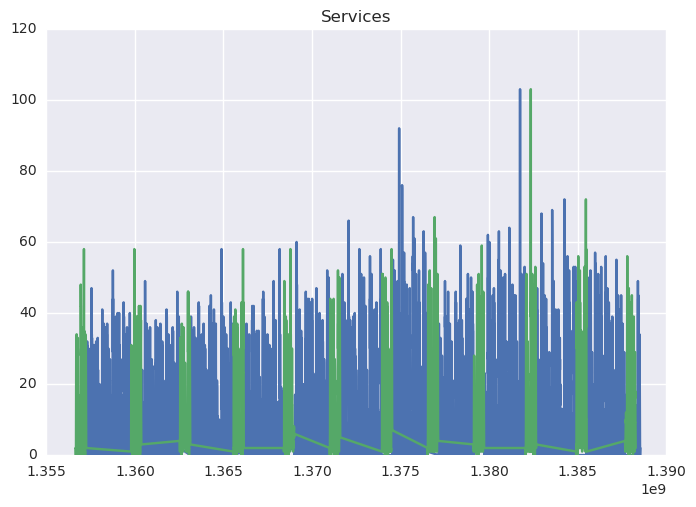

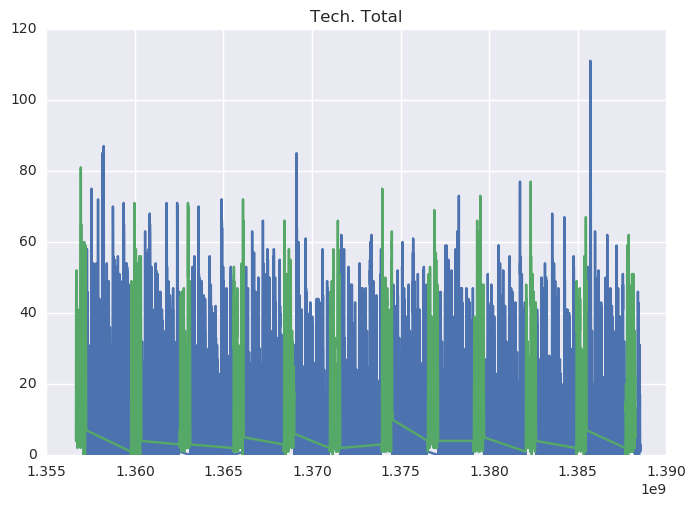

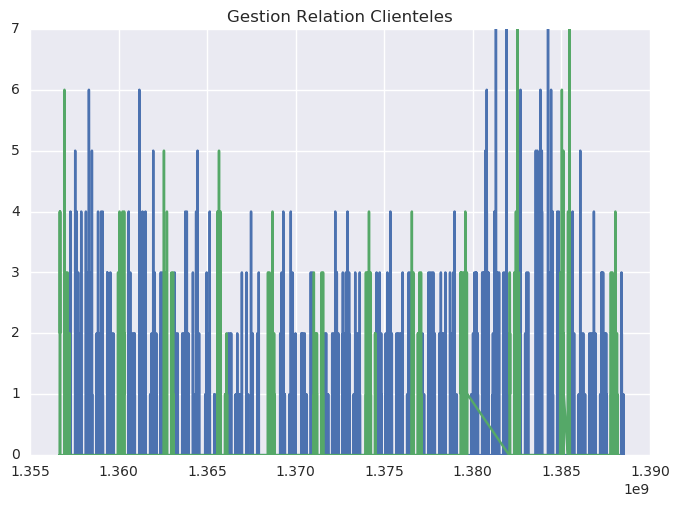

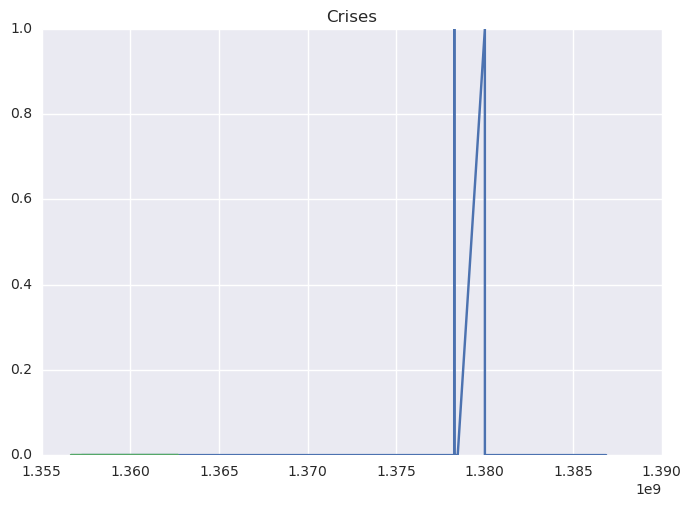

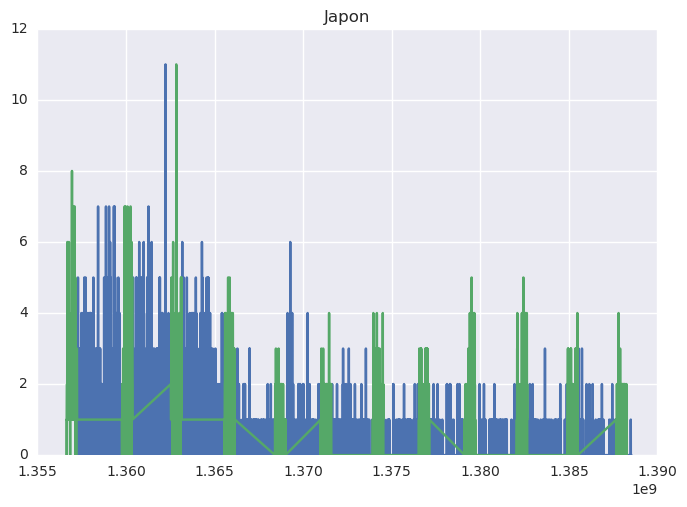

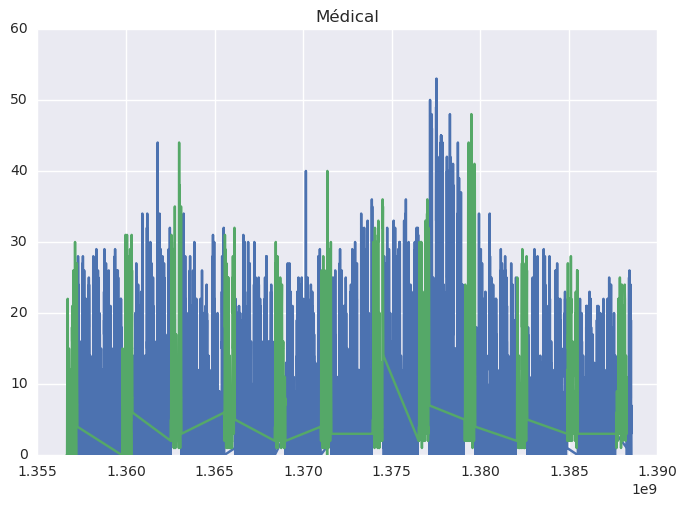

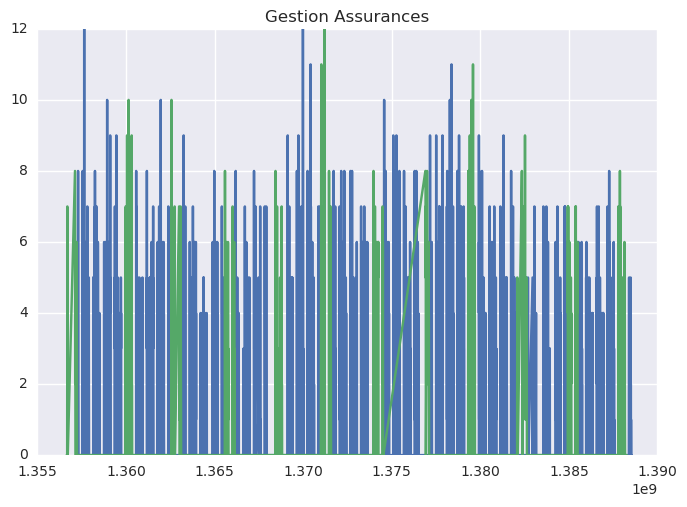

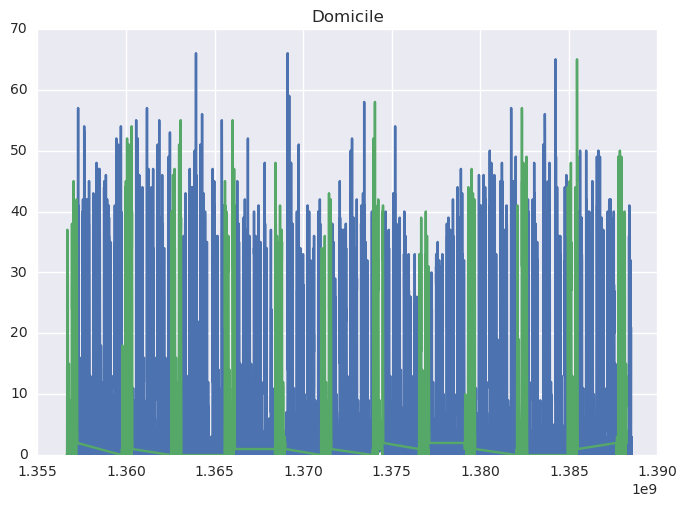

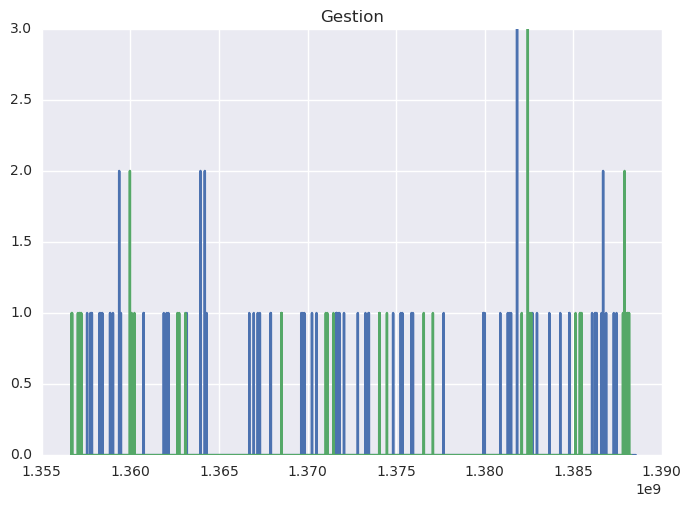

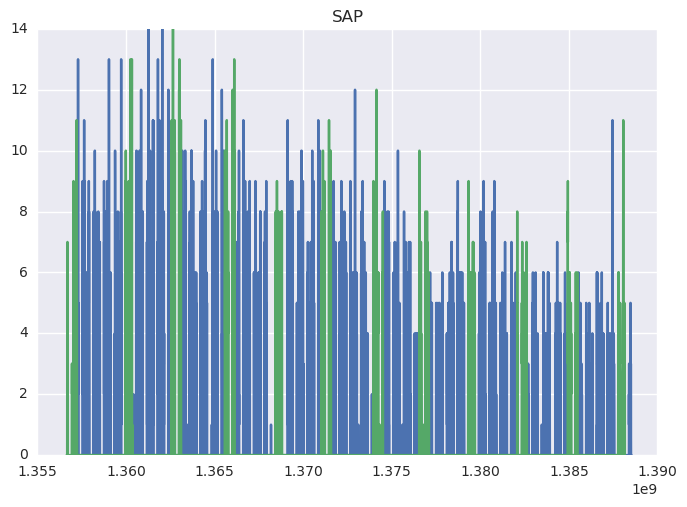

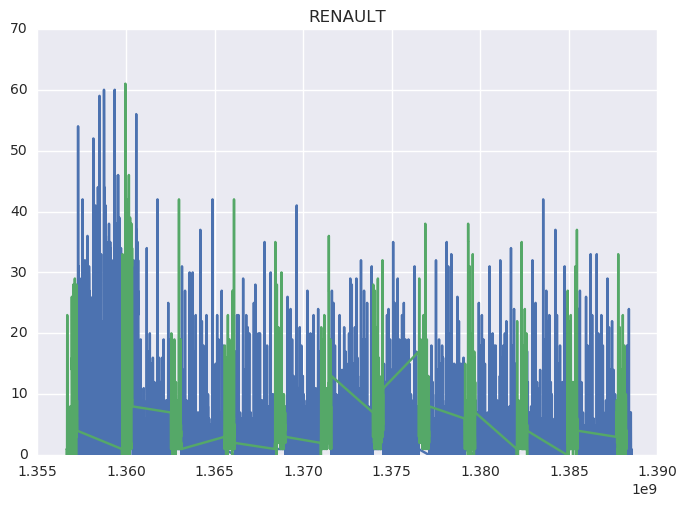

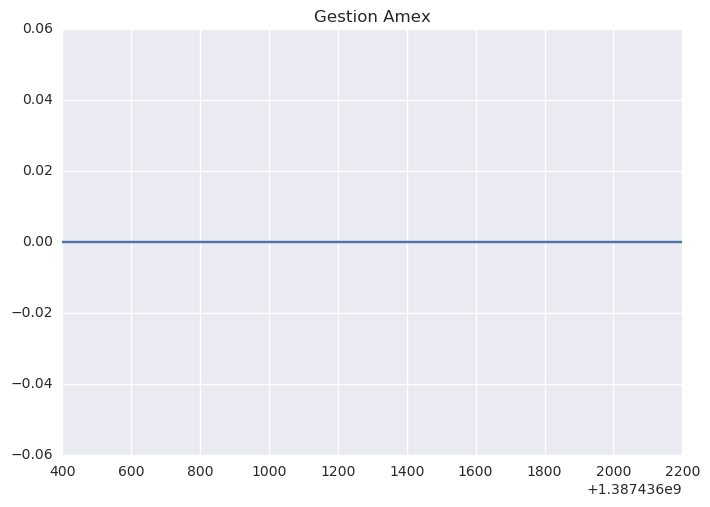

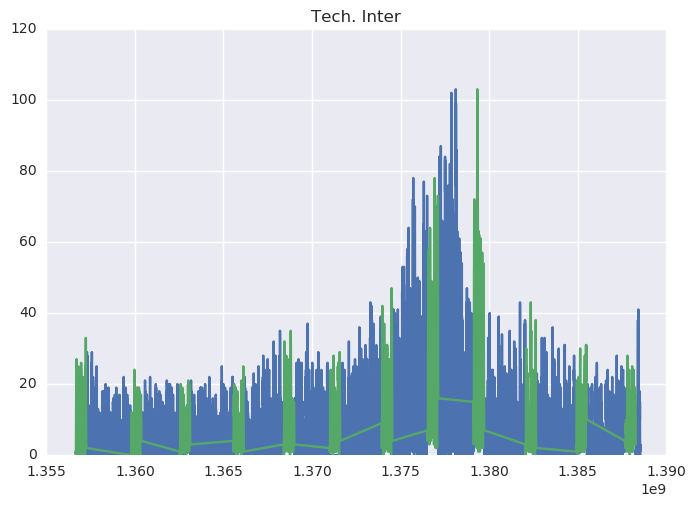

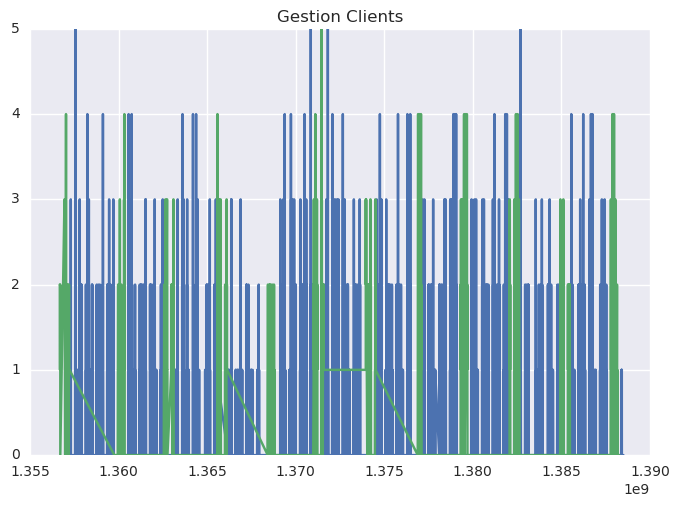

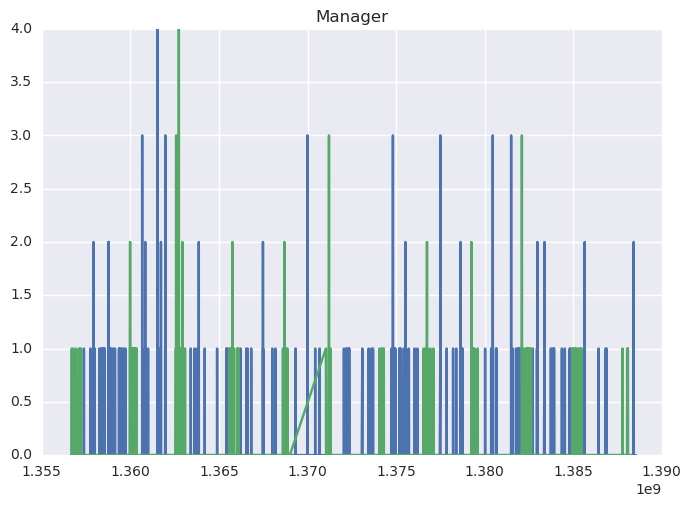

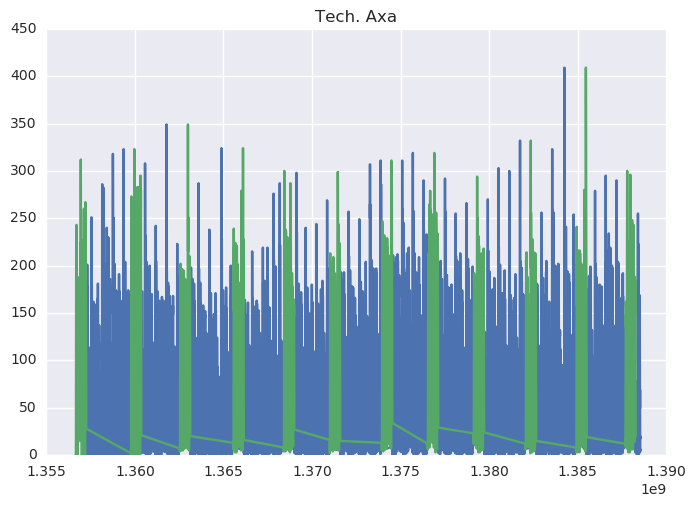

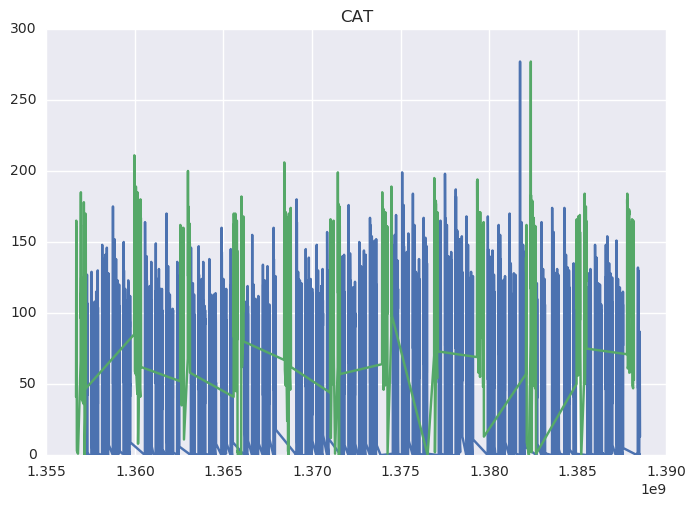

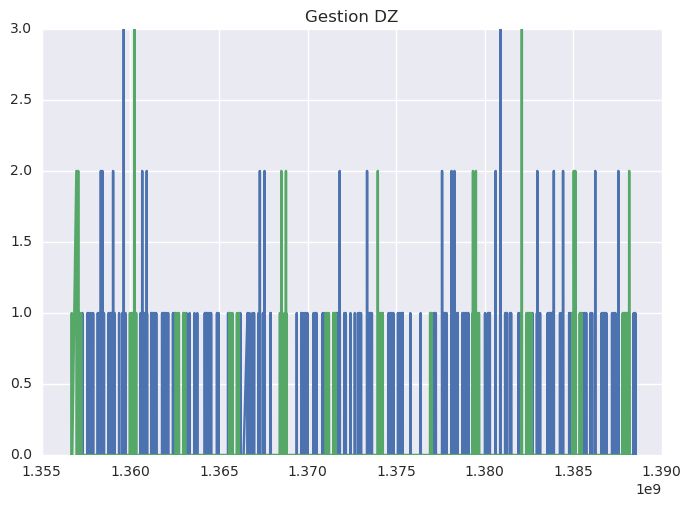

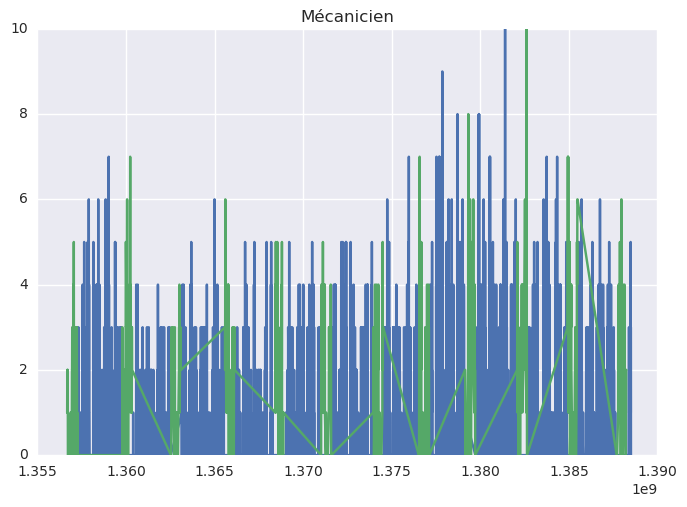

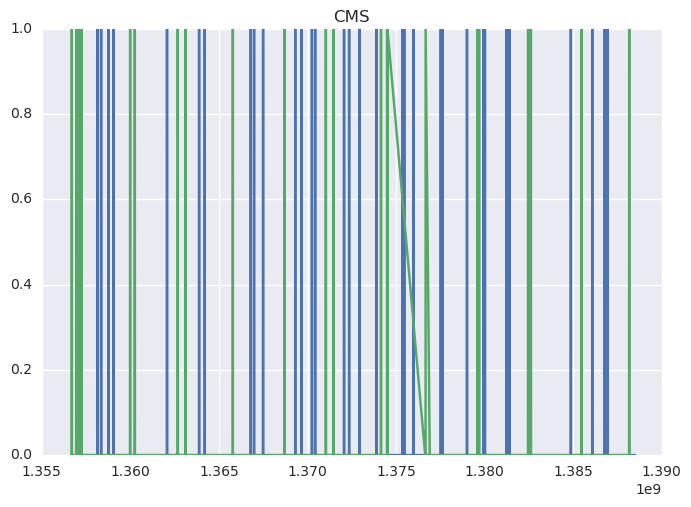

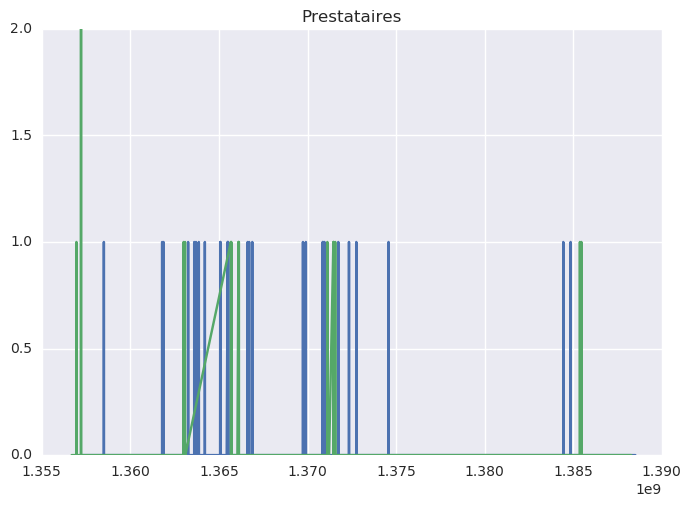

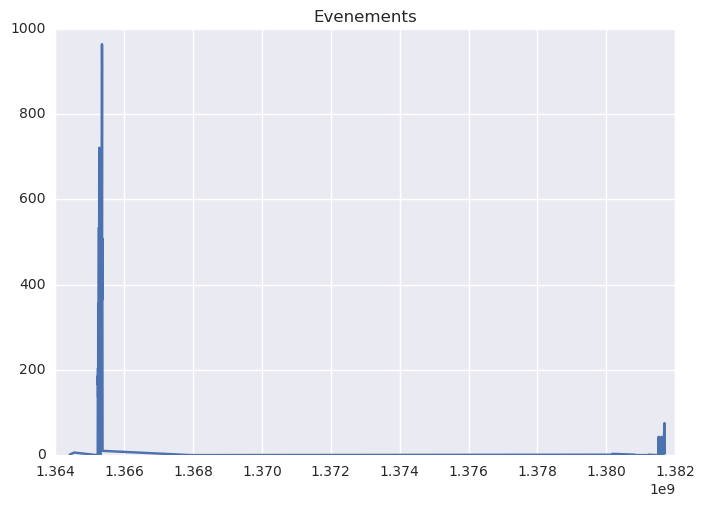

In [455]:
m = data['time_absolut'].max()
for cat in cats:
    data_cat = data[data['ASS_ASSIGNMENT'] == cat].sort(['time_absolut'])
    day = 15
    data_cat = data_cat[data_cat['year'] == 2013]
#     data_cat = data_cat[data_cat['month'] == 3]
#     data_cat = data_cat[data_cat['time_absolut'] > m - 60*60*24*28]
#     grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean()
    plt.plot(data_cat['time_absolut'],data_cat['CSPL_RECEIVED_CALLS'])
    
    
    data_cat = subm_data[subm_data['ASS_ASSIGNMENT'] == cat].sort(['time_absolut'])
    day = 15
#     data_cat = data_cat[data_cat['year'] == 2013]
#     data_cat = data_cat[data_cat['month'] == 3]
#     data_cat = data_cat[data_cat['time_absolut'] > m - 60*60*24*28]
#     grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean()
    plt.plot(data_cat['time_absolut'],data_cat['prediction'])
    
    
    plt.title(cat)
    plt.show()

/home/alogins/.local/lib/python3.4/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


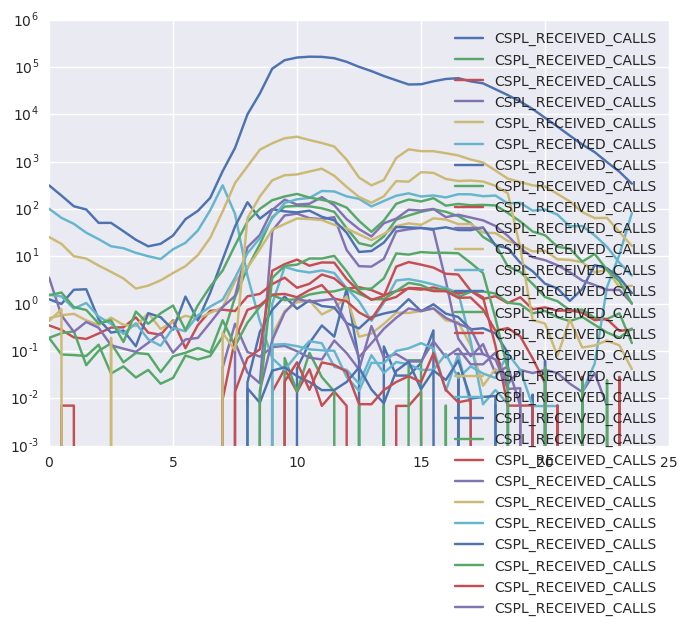

In [78]:
for cat in cats:
    plt.gca().set_yscale("log", nonposy='clip')
    data_cat = data[data['ASS_ASSIGNMENT'] == cat]
    day = 1
    data_cat = data_cat[data_cat['day_week'] == day]
    grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].var()
    plt.plot(grouped)
    plt.legend()

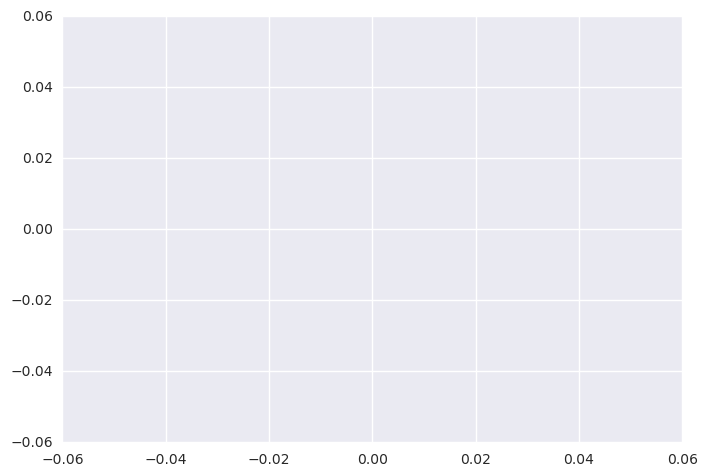

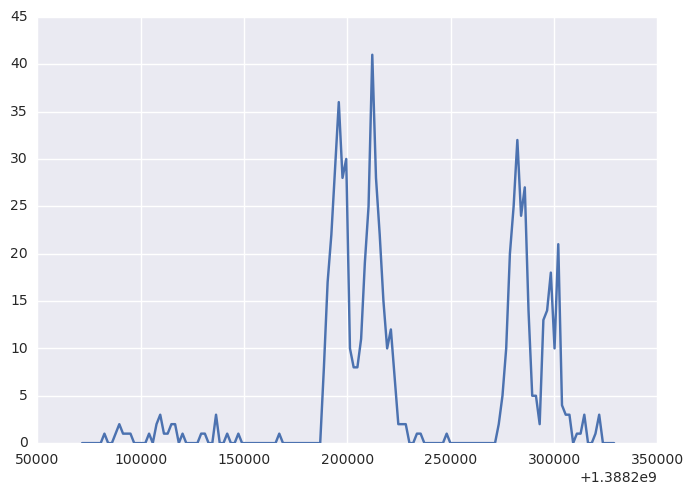

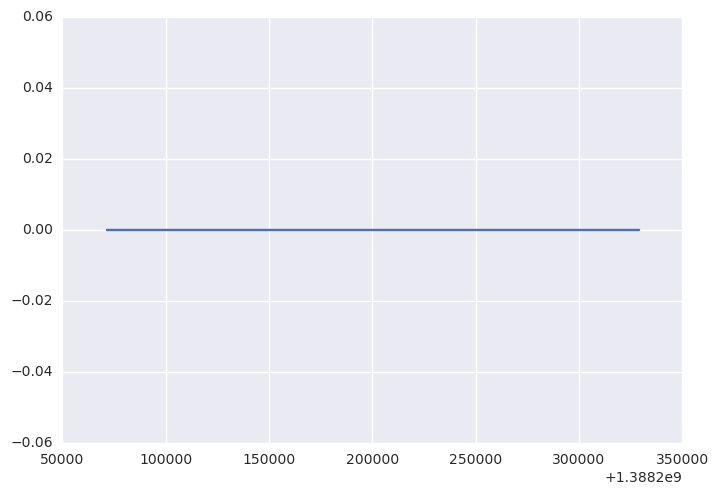

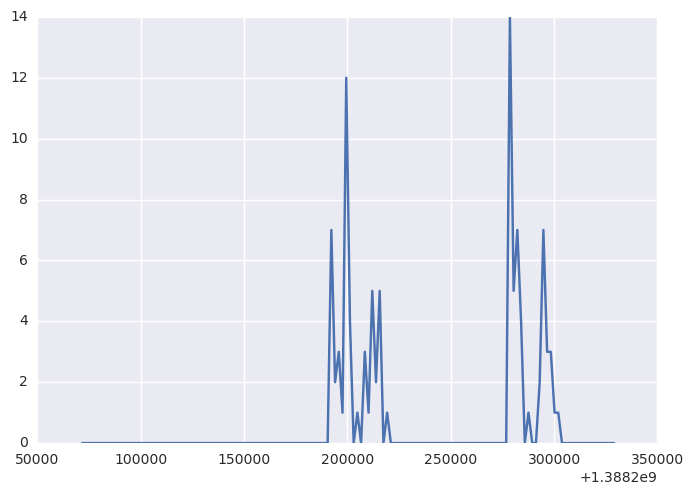

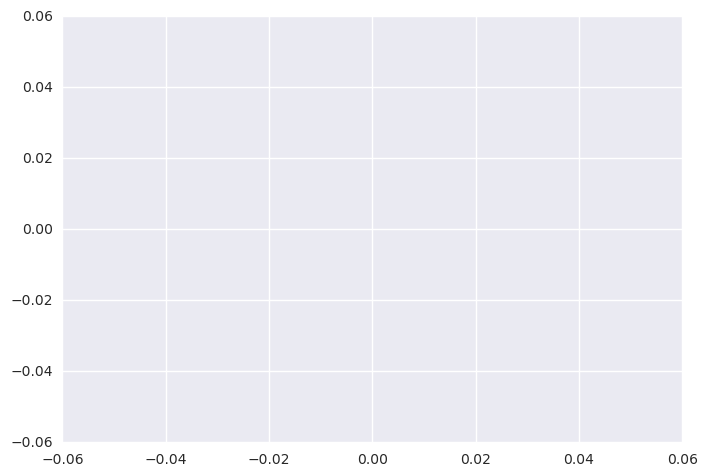

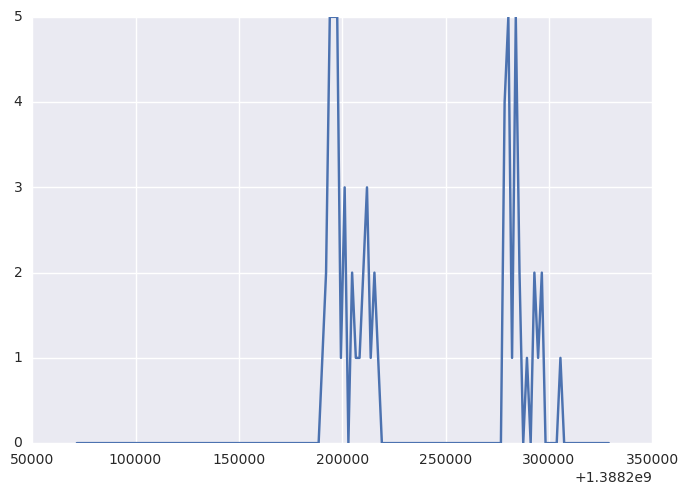

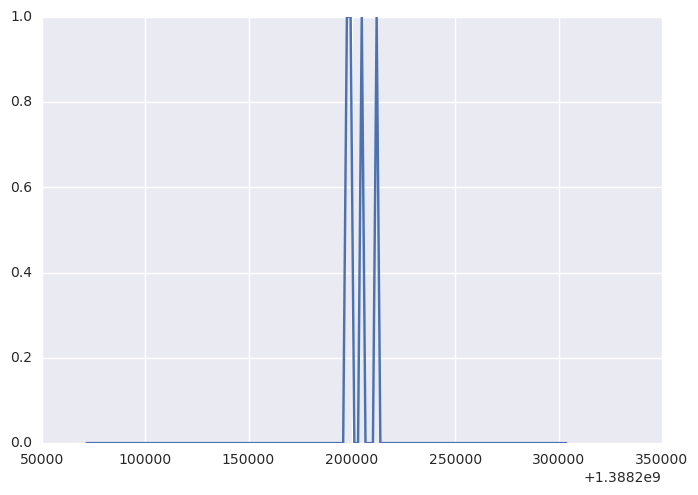

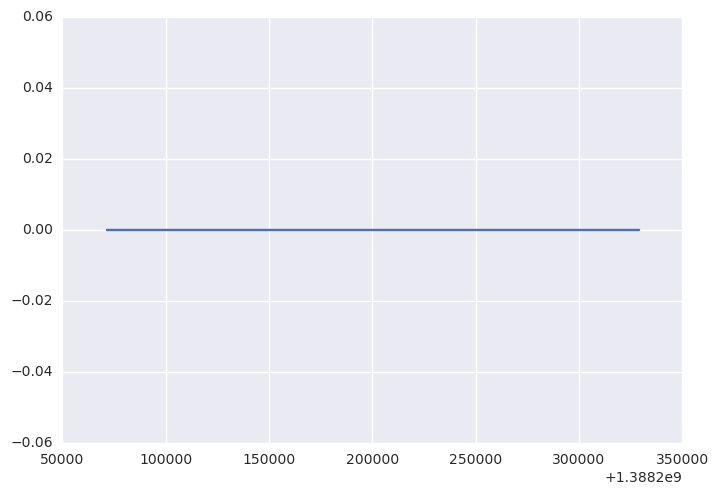

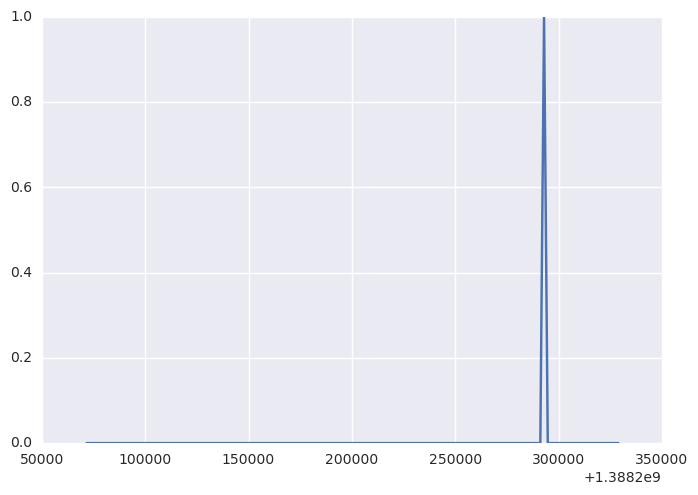

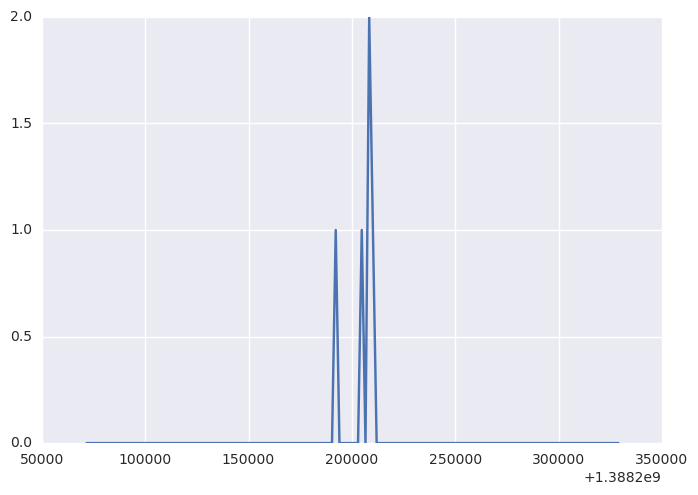

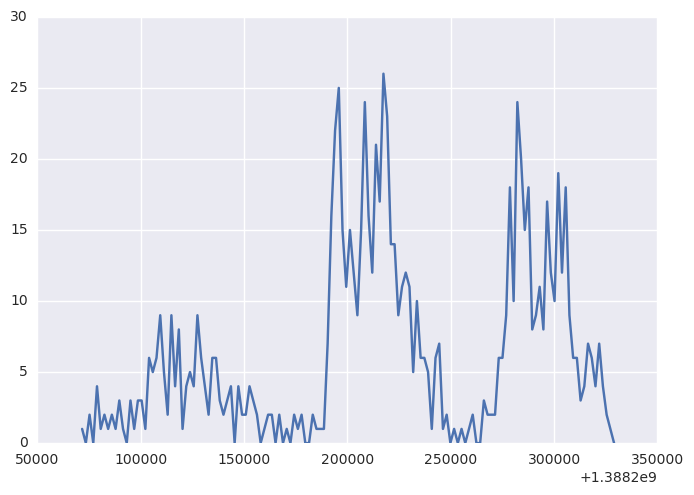

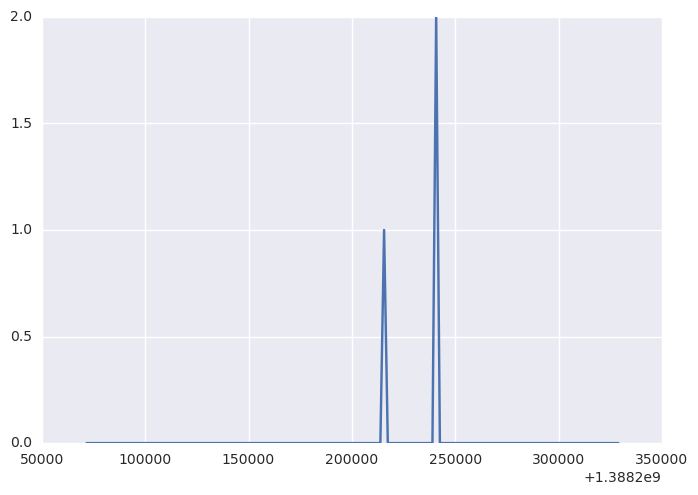

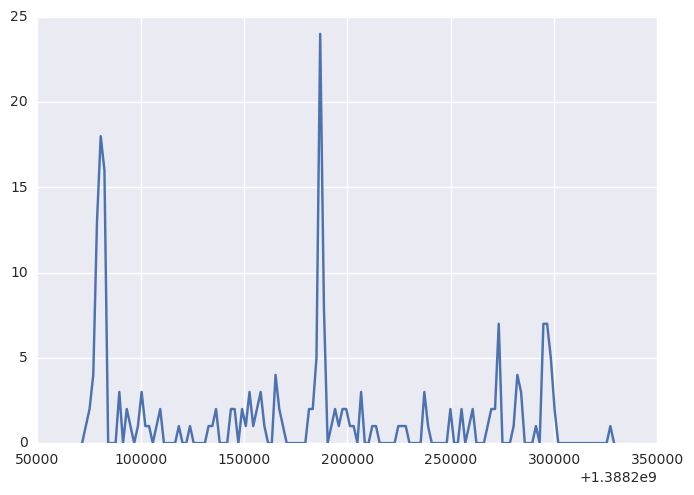

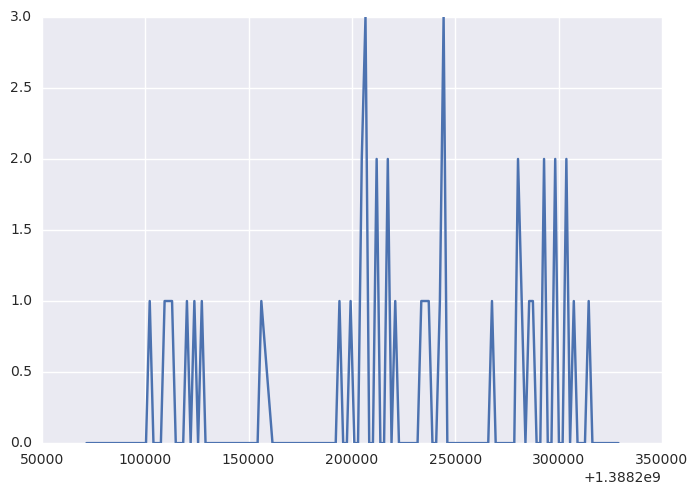

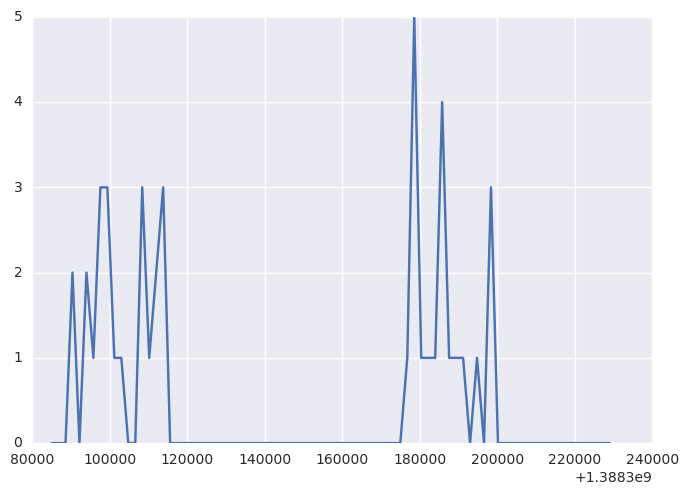

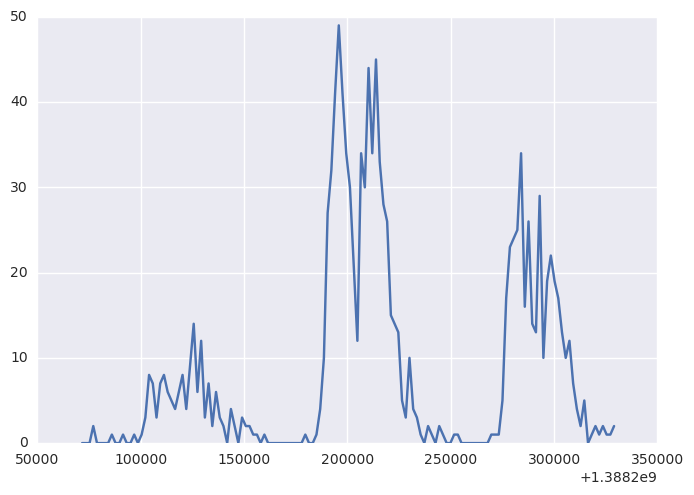

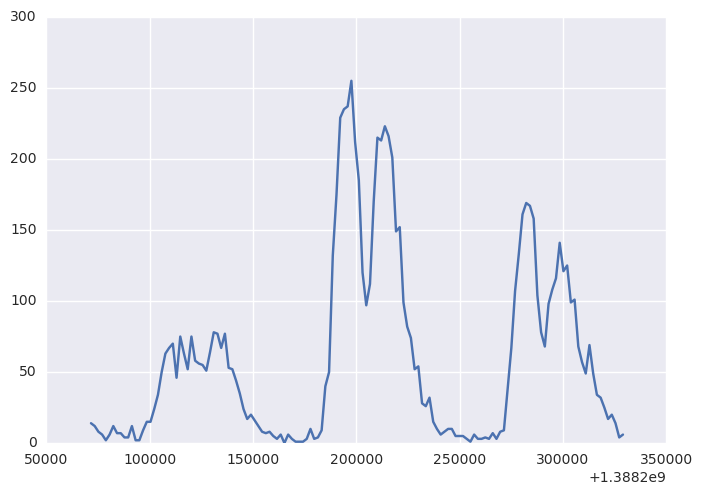

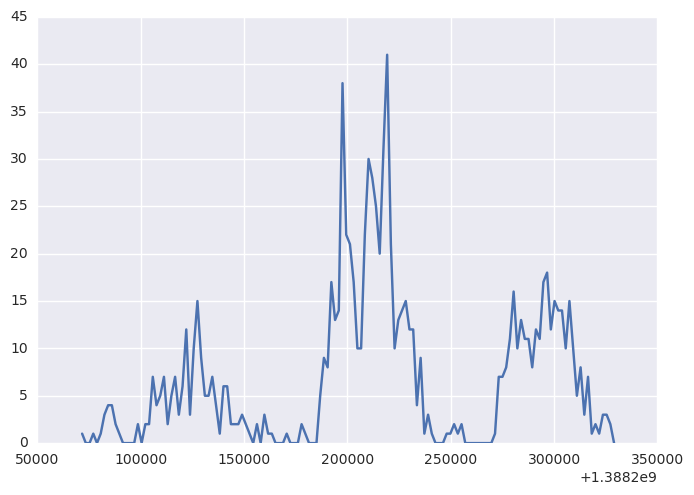

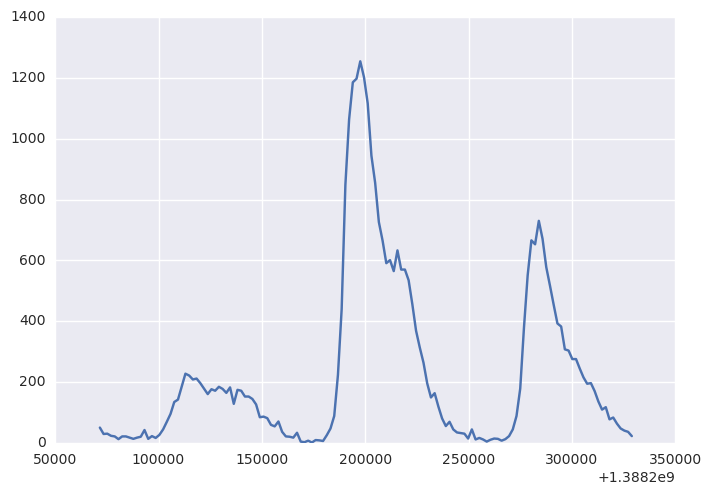

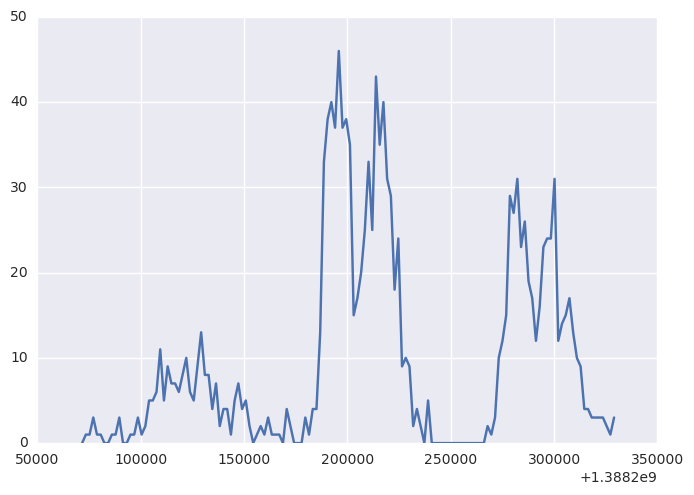

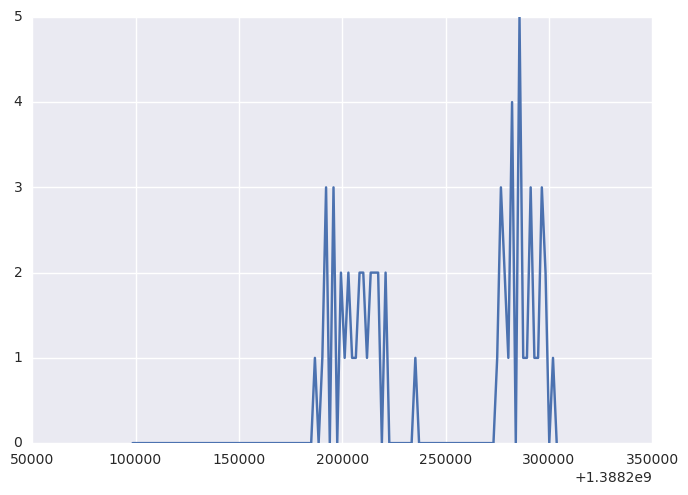

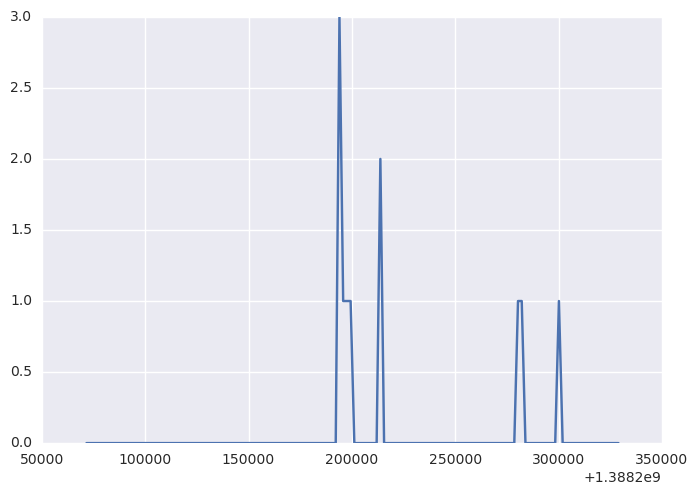

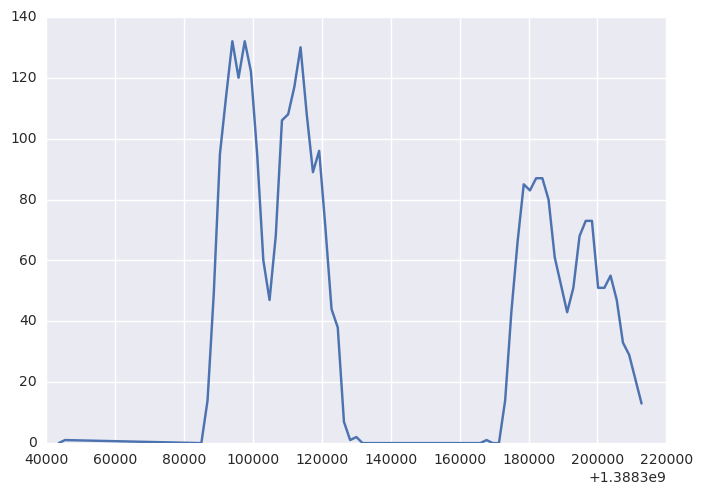

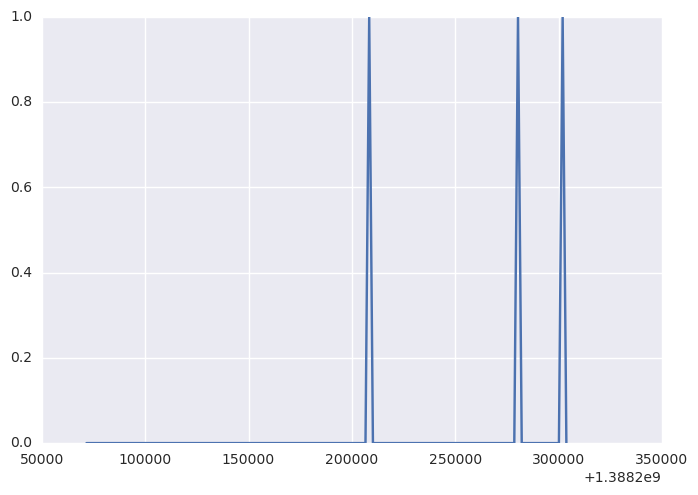

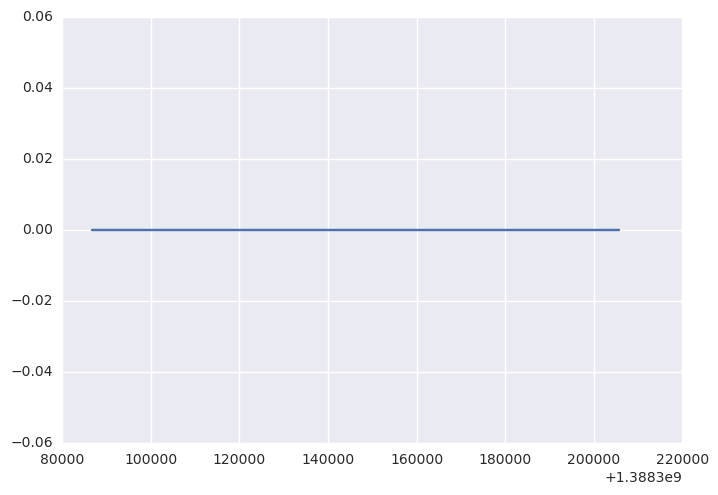

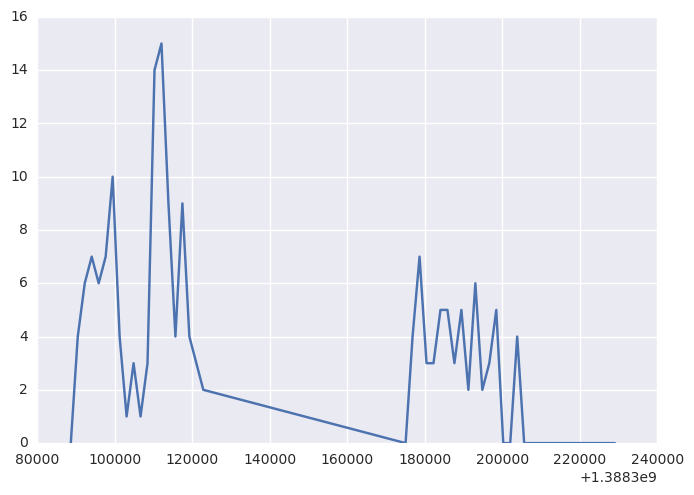

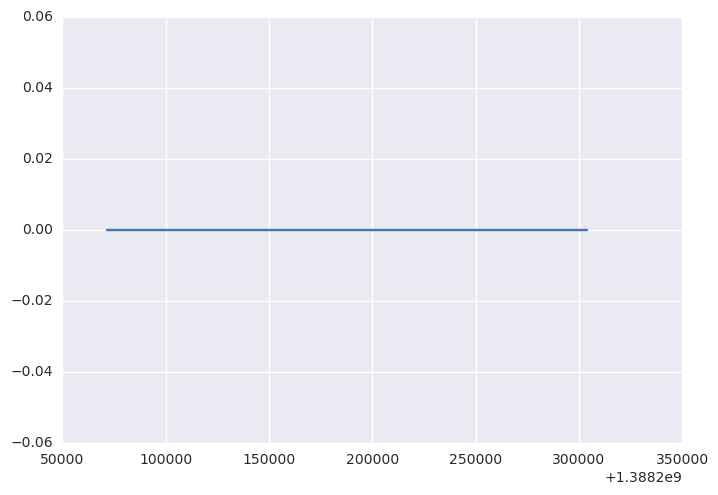

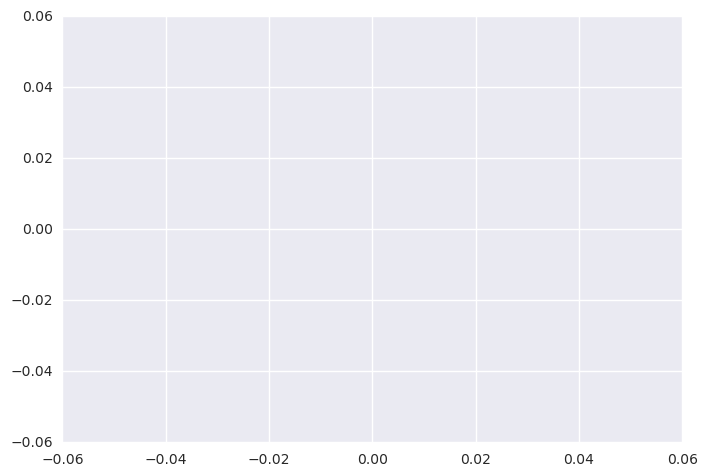

In [94]:
m = data['time_absolut'].max()
for cat in cats:
    data_cat = data[data['ASS_ASSIGNMENT'] == cat]
    day = 15
    data_cat = data_cat[data_cat['time_absolut'] > m - 60*60*24*10]
#     grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean()
    plt.plot(data_cat['time_absolut'],data_cat['CSPL_RECEIVED_CALLS'])
    plt.show()

In [55]:
subm_data['ASS_ASSIGNMENT'].unique()

array(['CMS', 'Crises', 'Domicile', 'Gestion',
       'Gestion - Accueil Telephonique', 'Gestion Assurances',
       'Gestion Relation Clienteles', 'Gestion Renault', 'Japon',
       'Médical', 'Nuit', 'RENAULT', 'Regulation Medicale', 'SAP',
       'Services', 'Tech. Axa', 'Tech. Inter', 'Téléphonie', 'Tech. Total',
       'Mécanicien', 'CAT', 'Manager', 'Gestion Clients', 'Gestion DZ',
       'RTC', 'Prestataires'], dtype=object)